# Project Heart Disease clustering, team nr 2

### Authors: Mateusz Andryszak, Jakub Rymarski

# Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import itertools
from sklearn import mixture
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import calinski_harabasz_score, silhouette_samples
from sklearn.metrics import silhouette_score
import warnings

In [73]:
df = pd.read_csv("heart_disease_patients.csv")

# Familiarization with the data

In [3]:
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,1,63,1,1,145,233,1,2,150,0,2.3,3
1,2,67,1,4,160,286,0,2,108,1,1.5,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2
3,4,37,1,3,130,250,0,0,187,0,3.5,3
4,5,41,0,2,130,204,0,2,172,0,1.4,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalach   303 non-null    int64  
 9   exang     303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slope     303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


In [74]:
df = df.drop(["id"], axis=1)

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,63,1,1,145,233,1,2,150,0,2.3,3
1,67,1,4,160,286,0,2,108,1,1.5,2
2,67,1,4,120,229,0,2,129,1,2.6,2
3,37,1,3,130,250,0,0,187,0,3.5,3
4,41,0,2,130,204,0,2,172,0,1.4,1


Val: We included Validation Team idea about column description.

### Description of columns
- **age**: Age of patient
- **sex**: Gender of patient
- **cp**: Chest pain type
- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)
- **chol**: Serum cholesterol in mg/dl
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **restecg**: Resting electrocardiographic results
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest (ST segment represents the interval between ventricular depolarization and repolarization on an ECG)
- **slope**: The slope of the peak exercise ST segment

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Pearson correlation, we can observe that correlations are low.

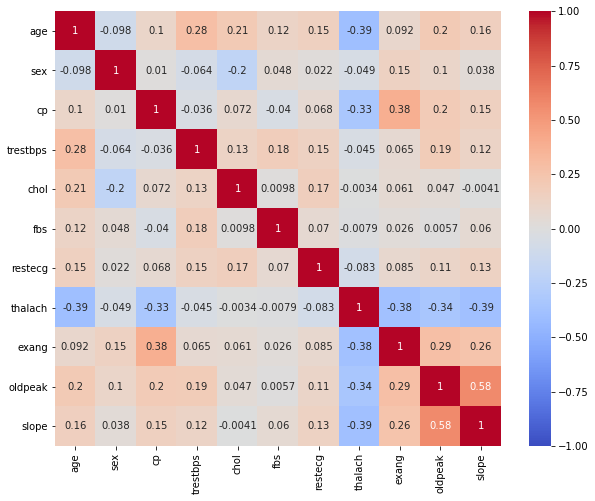

In [9]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
fig = plt.gcf() 
fig.set_size_inches(10, 8)
plt.show()

Spearman correlation

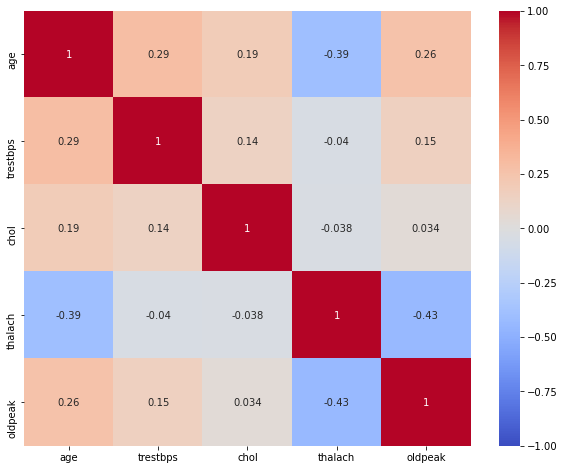

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obliczanie macierzy korelacji Spearmana
corr_matrix_spearman = df[["age", "trestbps", "chol", "thalach", "oldpeak"]].corr(method='spearman')

# Wyświetlanie mapy ciepła korelacji Spearmana
sns.heatmap(corr_matrix_spearman, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
fig = plt.gcf() 
fig.set_size_inches(10, 8)
plt.show()

Plotting distributions of variables

In [10]:
def plotPerColumnDistribution(df):
    num_columns = df.shape[1]
    num_rows = (num_columns + 1) // 2
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, 20))
    axes = axes.flatten()  # Flatten the axes array
    
    for i, column in enumerate(df.columns):
        ax = axes[i] if i < num_columns else axes[-1]  # Use the last available subplot if there are fewer columns than subplots
        
        ax.set_title(column.upper(), fontsize=25)
        sns.histplot(df[column], ax=ax)
        
    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()

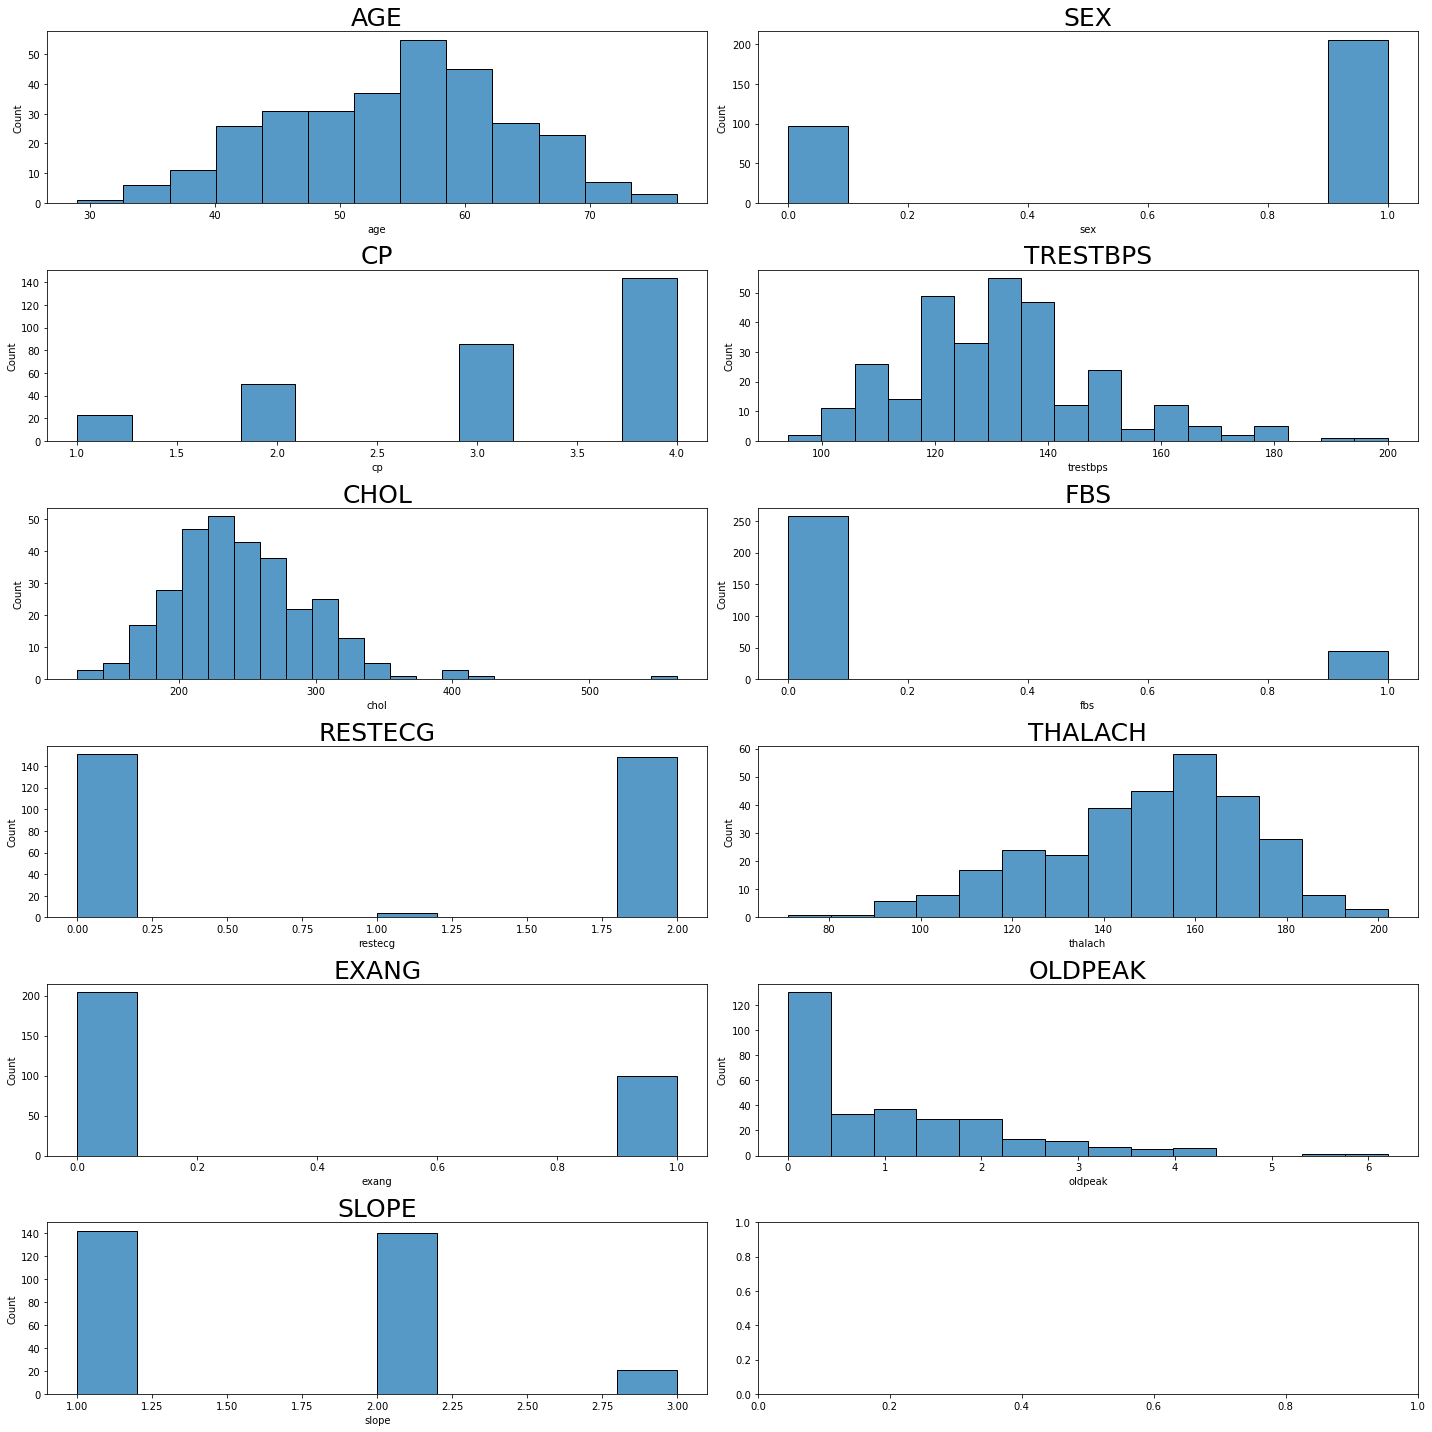

In [36]:
plotPerColumnDistribution(df)

# Prepocessing

We decided not to take advantage of one hot encoding, because results were worse.

In [67]:
# def one_hot_encoding(df, cols):
#     for col in cols:
#         encoded = pd.get_dummies(df[col]).astype(int)
#         for i, column in enumerate(encoded.columns):
#             encoded.rename(columns={column: col+"_"+str(i)}, inplace=True)
#         df = pd.concat([df, encoded], axis=1)
#     df = df.drop(cols, axis=1)
#     return df

In [37]:
#df = one_hot_encoding(df, ["cp", "slope", "restecg"])

In [4]:
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,1,63,1,1,145,233,1,2,150,0,2.3,3
1,2,67,1,4,160,286,0,2,108,1,1.5,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2
3,4,37,1,3,130,250,0,0,187,0,3.5,3
4,5,41,0,2,130,204,0,2,172,0,1.4,1


## Scaling

VAL: We decided to use MinMaxScaler, because we also try standarization, but results were much worse.

In [75]:
scaler = MinMaxScaler()
df_scaled = df.copy()
# we decided to scal all columns, because we found out that category variables are ordered
df_scaled[df_scaled.columns]=scaler.fit_transform(df)
#df_scaled[["age", "trestbps", "chol", "thalach", "oldpeak"]] = scaler.fit_transform(df[["age", "trestbps", "chol", "thalach", "oldpeak"]])

In [7]:
df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0


First attempts with models, getting now how clustering models look like in our case

## Kmeans

### Elbow method

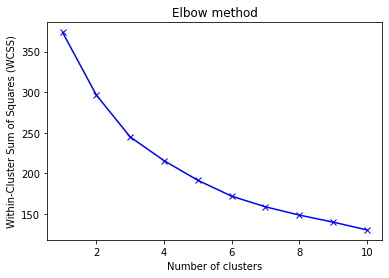

In [5]:
warnings.filterwarnings("ignore")

wcss = []
max_clusters = 10  # Maksymalna liczba klastrów

for n_clusters in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Wykres metody łokcia
plt.plot(range(1, max_clusters+1), wcss, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow method')
plt.show()

### Silhouette

In [6]:
# Function from labs
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

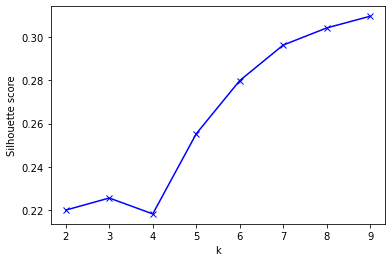

In [7]:
warnings.filterwarnings("ignore")

cluster_num_seq = range(2, 10)
silhouette_vec = count_clustering_scores(df_scaled, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

We can conclude that one of the number 6,7, 8 or 9 is optimal number of clusters, but check it in more formal way.

VAL: We included Validation Team ideas about Cross-validation and metrics.

## Cross-validation

In [8]:
def clustering_validation(X, model, n_clusters):
    # silhouette i calinski_harabasz
    silhouette_scores = []
    calinski_harabasz_scores = []

    kf = KFold(n_splits=10)
    for train_index, test_index in kf.split(X):
      
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]

        model.fit(X_train)

        labels = model.predict(X_test)

        silhouette_vals = silhouette_samples(X_test, labels)
        silhouette_avg = np.mean(silhouette_vals)
        silhouette_scores.append(silhouette_avg)

        calinski_harabasz_scores.append(calinski_harabasz_score(X_test, labels))

    silhouette_avg = np.mean(silhouette_scores)
    calinski_harabasz_avg = np.mean(calinski_harabasz_scores)

    # printing
    print("Number of clusters:", n_clusters)
    print("Average silhouette:", silhouette_avg)
    print("Average Calińskiego-Harabasza:", calinski_harabasz_avg)
    print()




In [10]:
#Kmeans

warnings.filterwarnings("ignore")
n_clusters_list = range(2, 11)

for n_clusters in n_clusters_list:
    model = KMeans(n_clusters, random_state=42)
    clustering_validation(df_scaled, model, n_clusters)

Number of clusters: 2
Average silhouette: 0.23951183879084775
Average Calińskiego-Harabasza: 9.54206250071203

Number of clusters: 3
Average silhouette: 0.2456374168318222
Average Calińskiego-Harabasza: 9.586845410188094

Number of clusters: 4
Average silhouette: 0.2449090612598135
Average Calińskiego-Harabasza: 9.083223084671735

Number of clusters: 5
Average silhouette: 0.2779103237365065
Average Calińskiego-Harabasza: 9.090208997887412

Number of clusters: 6
Average silhouette: 0.29733296128555275
Average Calińskiego-Harabasza: 9.047428611086396

Number of clusters: 7
Average silhouette: 0.3032716091569501
Average Calińskiego-Harabasza: 9.025209976002397

Number of clusters: 8
Average silhouette: 0.3092307589778079
Average Calińskiego-Harabasza: 9.099892698750264

Number of clusters: 9
Average silhouette: 0.3130623112209774
Average Calińskiego-Harabasza: 9.106893960881397

Number of clusters: 10
Average silhouette: 0.29786831719182116
Average Calińskiego-Harabasza: 8.87310944289795


In [11]:
# GMM
n_clusters_list = range(2, 11)

for n_clusters in n_clusters_list:
    model = GaussianMixture(n_components=n_clusters)
    clustering_validation(df_scaled, model, n_clusters)

Number of clusters: 2
Average silhouette: 0.23030765955752056
Average Calińskiego-Harabasza: 9.19207270557903

Number of clusters: 3
Average silhouette: 0.22379179309728053
Average Calińskiego-Harabasza: 8.336686368590744

Number of clusters: 4
Average silhouette: 0.2368391386081301
Average Calińskiego-Harabasza: 8.524942451957191

Number of clusters: 5
Average silhouette: 0.27684893944894096
Average Calińskiego-Harabasza: 9.14231595699582

Number of clusters: 6
Average silhouette: 0.27716426270999617
Average Calińskiego-Harabasza: 8.5846493311008

Number of clusters: 7
Average silhouette: 0.2906403227691294
Average Calińskiego-Harabasza: 8.792847713787179

Number of clusters: 8
Average silhouette: 0.28738003056935224
Average Calińskiego-Harabasza: 8.903420967483086

Number of clusters: 9
Average silhouette: 0.2908810540084198
Average Calińskiego-Harabasza: 8.595330195059121

Number of clusters: 10
Average silhouette: 0.28658271389801243
Average Calińskiego-Harabasza: 8.473513248355951

It seems that our predictions were accurate, 7 can be our the most trust-worthy candidate.



### Visualisations 

Easy example of Kmeans

In [12]:
def K_means(df, num_clusters):
    df2=df.copy()
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df2)

    labels = kmeans.labels_

    df2['cluster_label'] = labels
    return df2

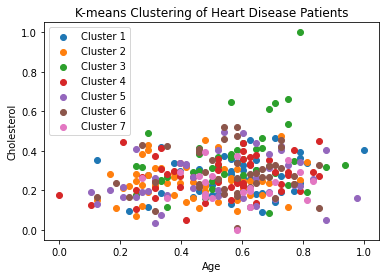

In [13]:
num_clusters = 7

df_km=K_means(df_scaled, num_clusters)

# Wizualizacja klastrów
for cluster in range(num_clusters):
    cluster_df = df_km[df_km['cluster_label'] == cluster]
    plt.scatter(cluster_df['age'], cluster_df['chol'], label=f'Cluster {cluster+1}')

plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('K-means Clustering of Heart Disease Patients')
plt.legend()
plt.show()

Function to plot clusters: 

In [14]:
def plot_clusters(df, columns, num_clusters):
    column_pairs = list(itertools.combinations(columns, 2))

    # Ustawienie mapy kolorów dla klastrów
    colors = plt.cm.get_cmap('tab10')

    fig, axs = plt.subplots(len(column_pairs), 1, figsize=(10, len(column_pairs) * 6))

    for i, pair in enumerate(column_pairs):
        ax = axs[i]
        ax.set_xlabel(pair[0])
        ax.set_ylabel(pair[1])

        for cluster in range(num_clusters):
            cluster_df = df[df['cluster_label'] == cluster]
            ax.scatter(cluster_df[pair[0]], cluster_df[pair[1]], c=[colors(cluster)], label=f'Cluster {cluster+1}')

        ax.legend()
        ax.set_title(f'{pair[0]} vs {pair[1]}')

    plt.tight_layout()
    plt.show()

Plotting kmeans, but is still hard to observe anything.

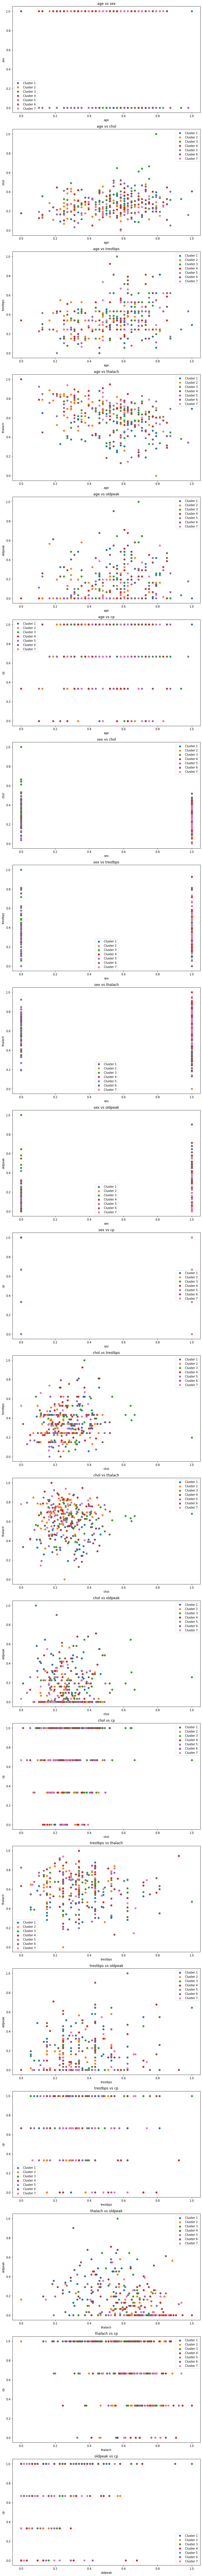

In [15]:
num_clusters = 7
columns = ['age', 'sex', 'chol', 'trestbps', 'thalach', 'oldpeak', 'cp'] 

plot_clusters(df_km, columns, num_clusters)

Sex and restecg seem to be discriminative factors, but it is hard to observe strong relationships.

### Hierarchical clustering

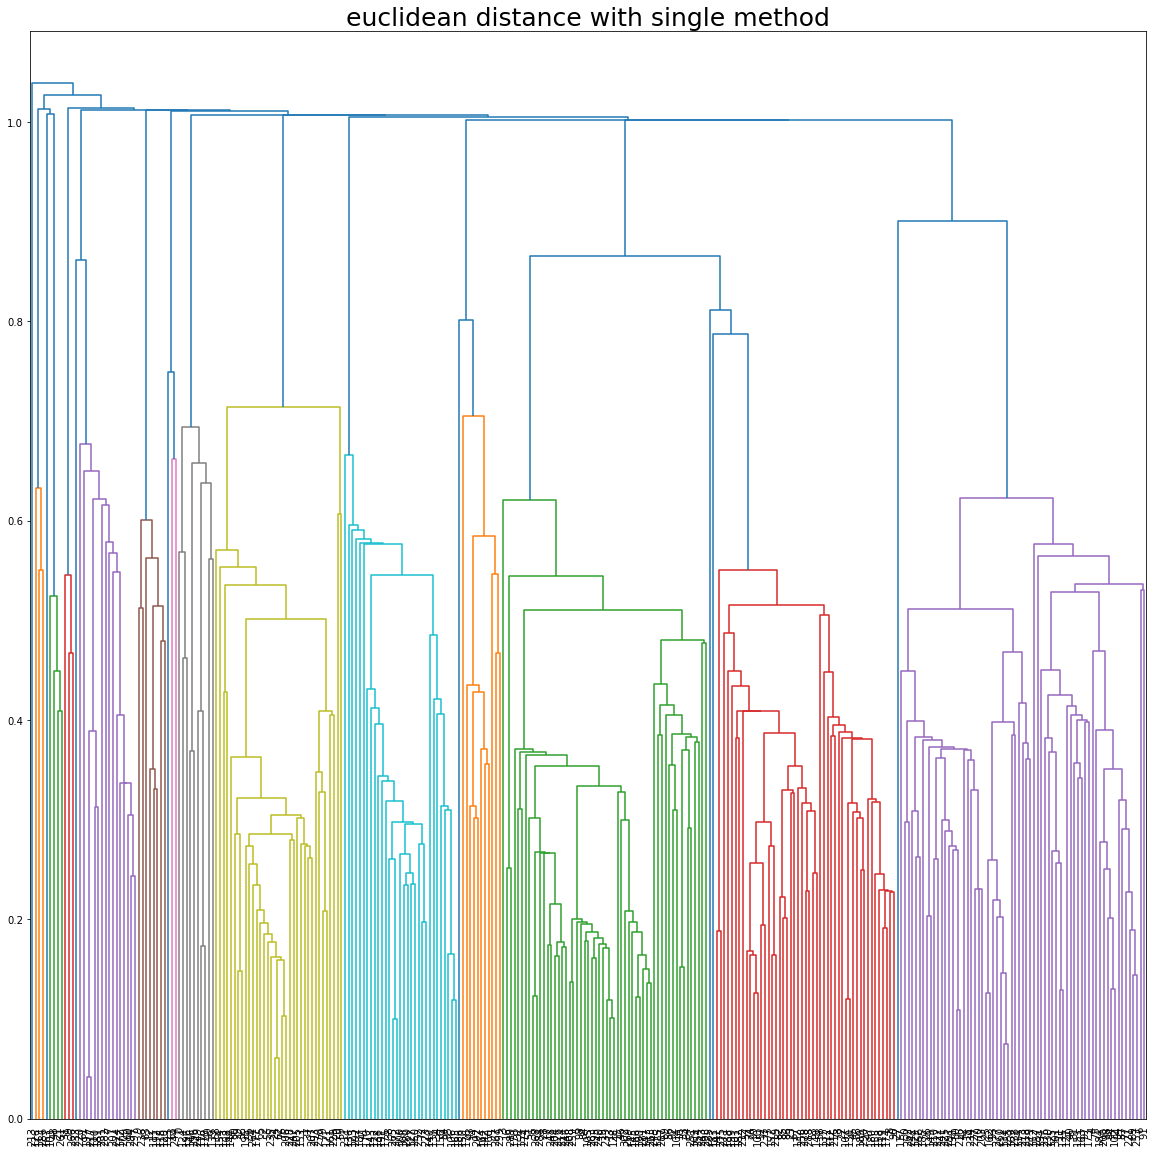

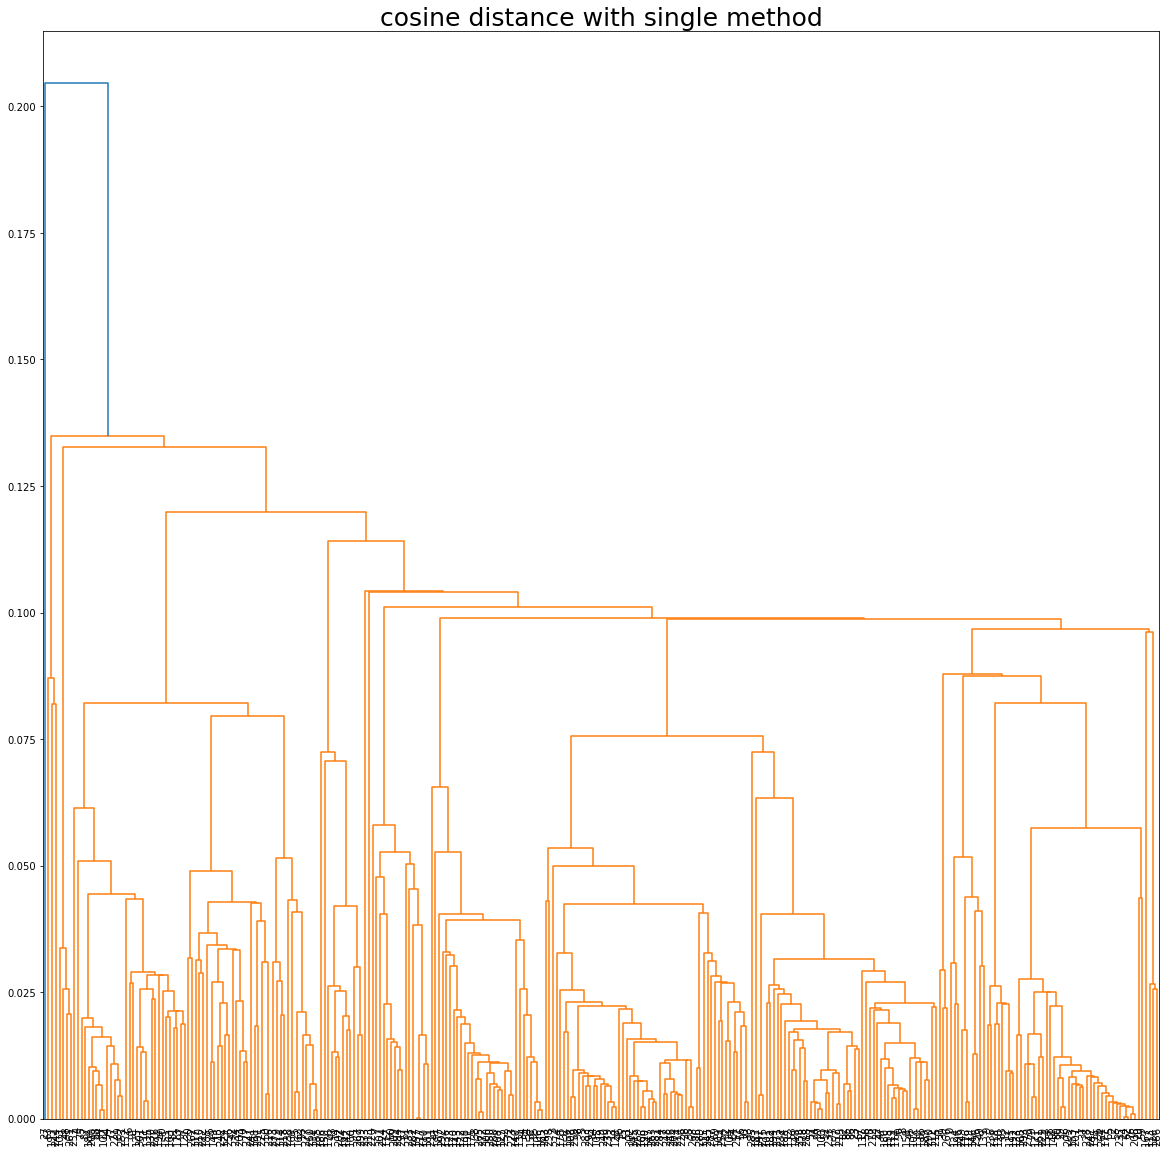

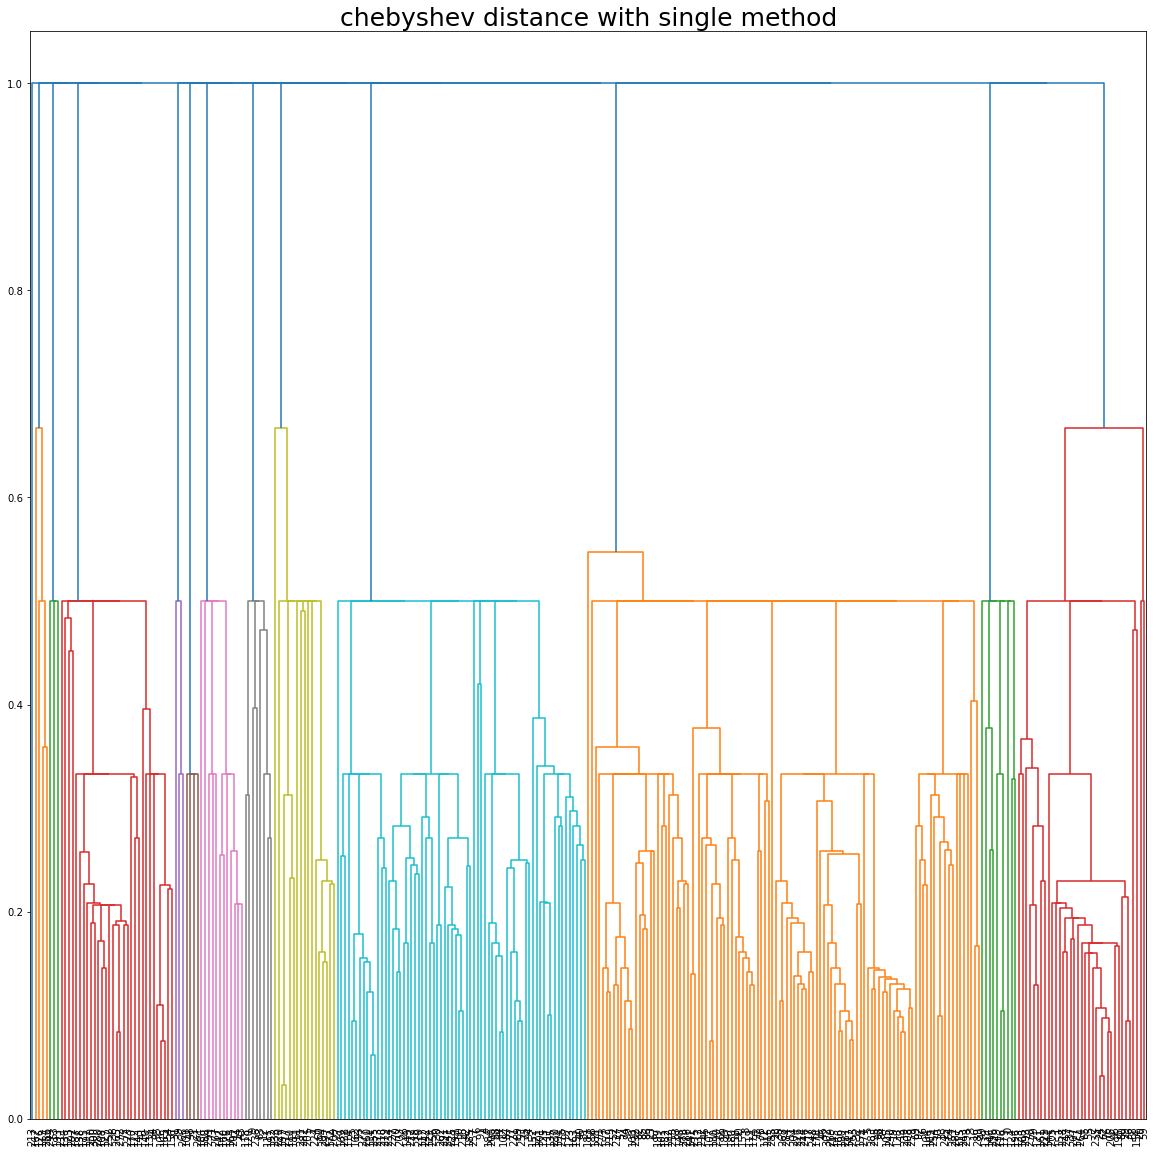

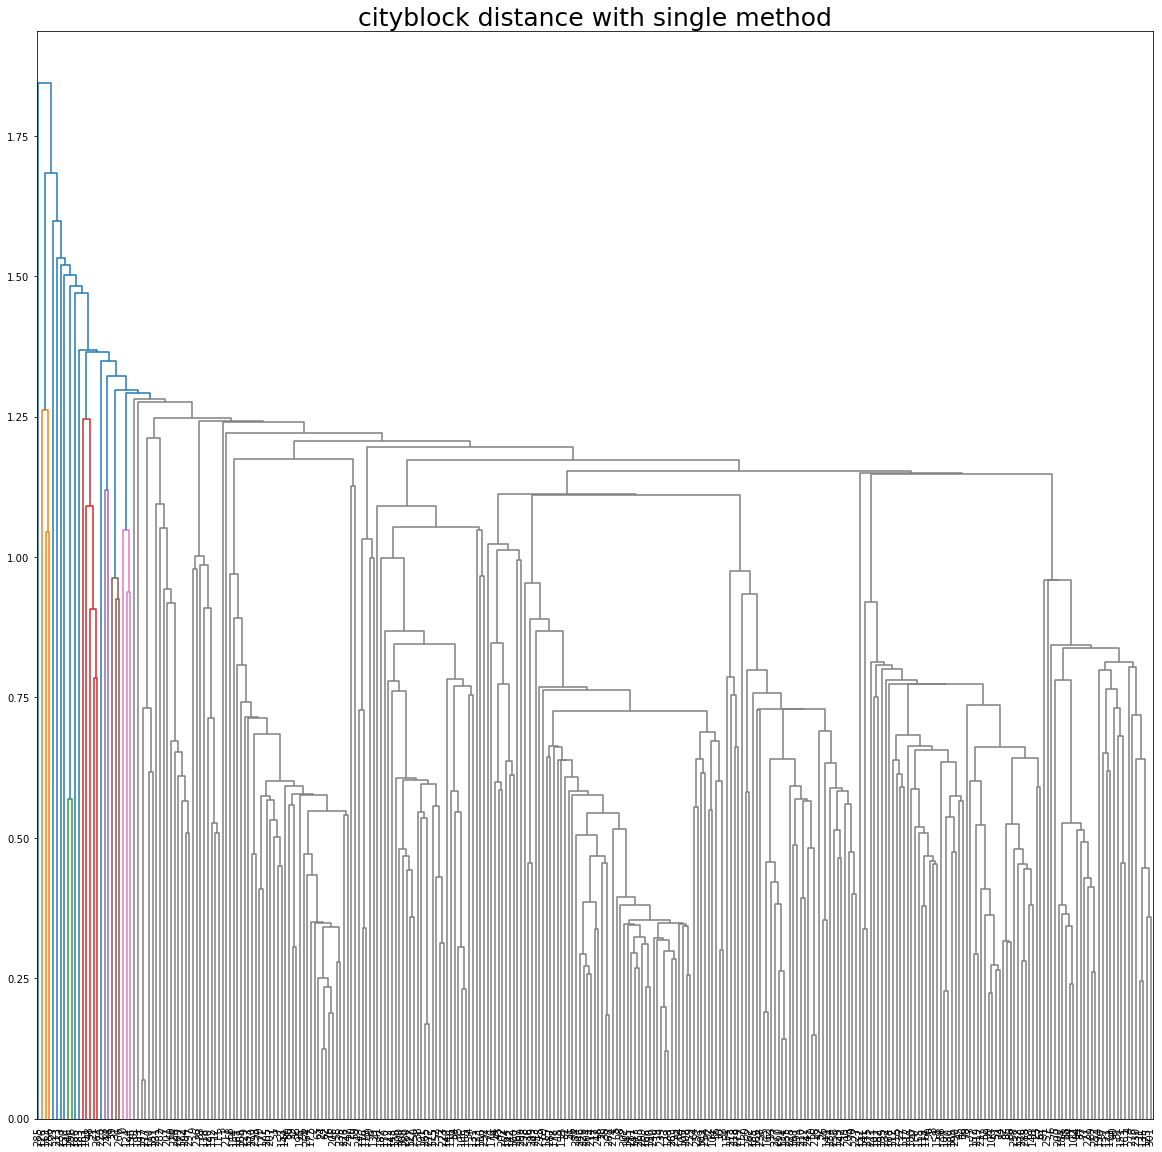

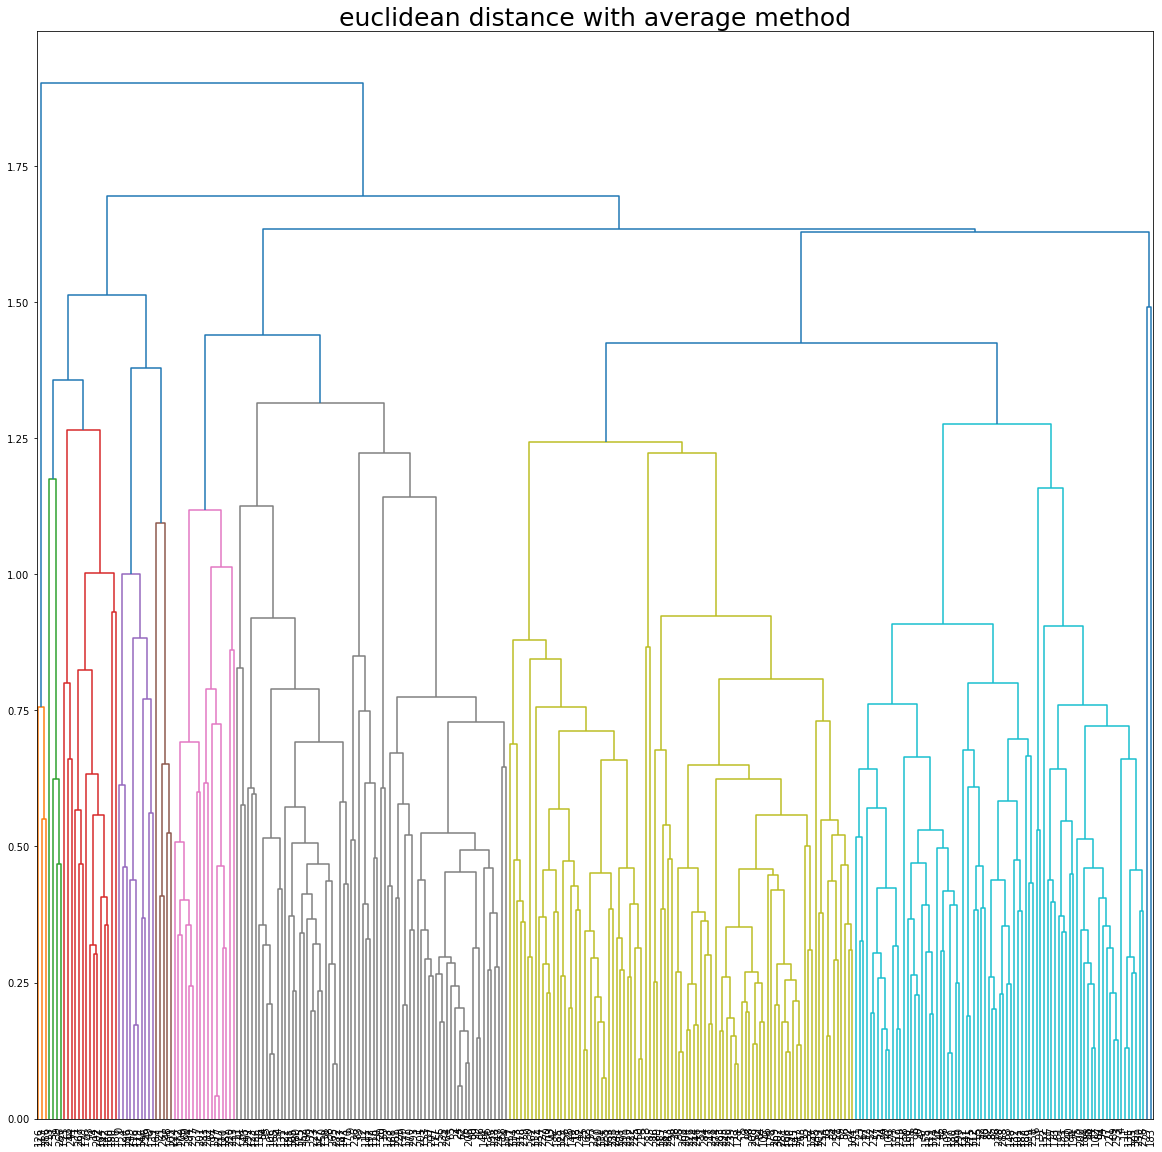

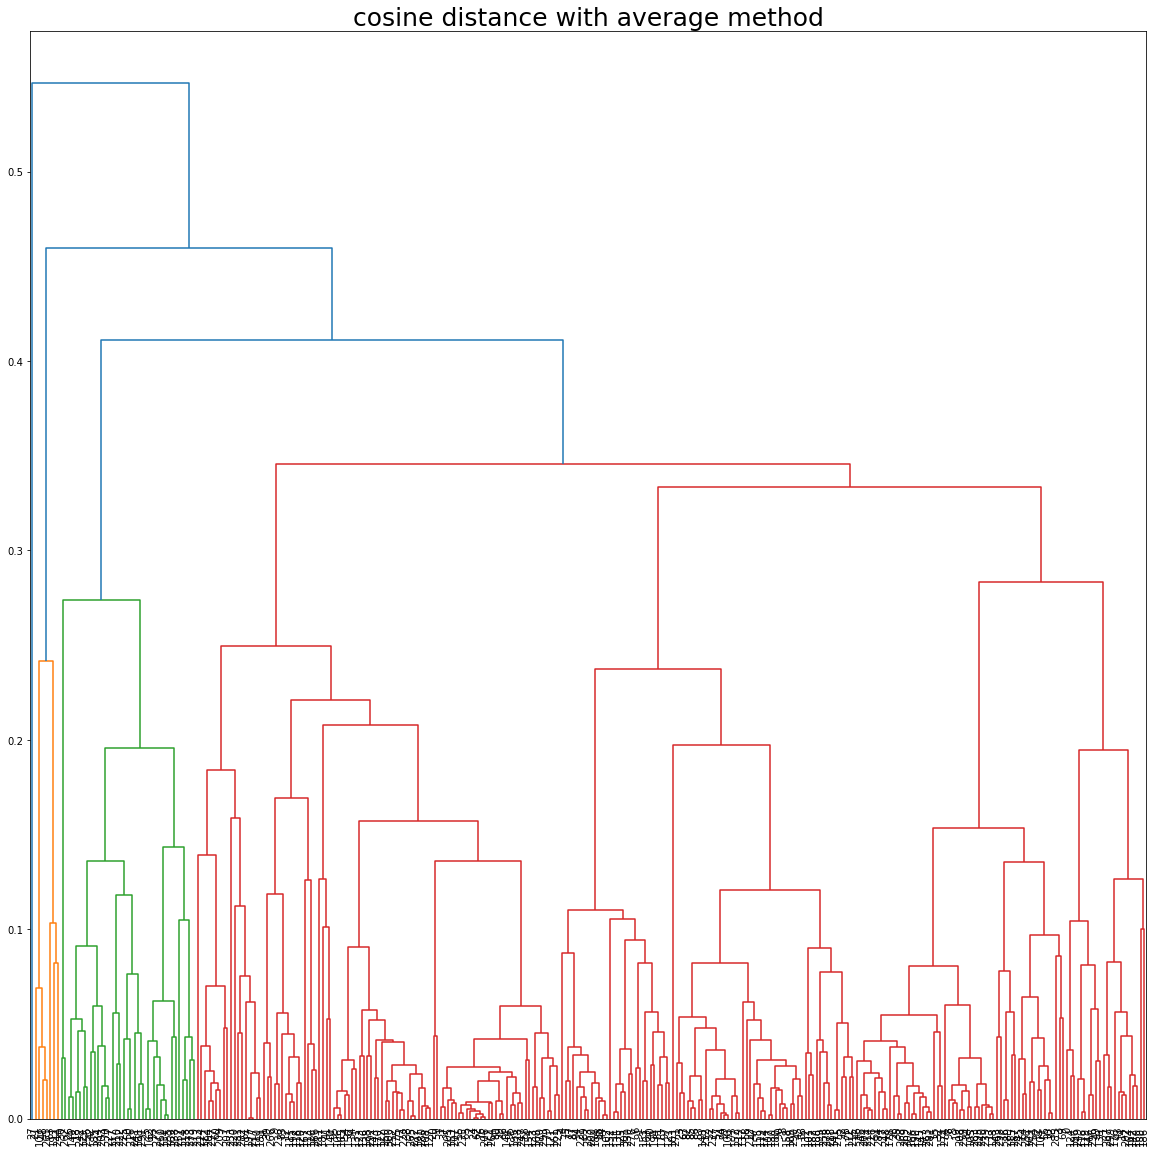

KeyboardInterrupt: 

In [16]:
import time
import scipy.cluster.hierarchy as sch

start = time.time()

metrics = ['euclidean', 'cosine', 'chebyshev', 'cityblock']
methods = ['single','average', 'complete']

for method in methods:
    for metric in metrics:
        plt.figure(figsize=(20, 20))
        mergings = sch.linkage(df_scaled, metric=metric,method=method)
        sch.dendrogram(mergings,
                   leaf_rotation=90,
                   leaf_font_size=10,
                   )
        plt.title(f'{metric} distance with {method} method', fontsize=25)
        plt.show() 


end = time.time()
print(f'Time elapsed: {end - start}')

Some metrics like for example Euclidean distance with complete method show that 7 clusters can be good choice.

### Gaussian Mixture Models

Maybe standarizing will be proftable?

In [16]:
standartizer = StandardScaler()
df_stand = df.copy()
df_stand[df_stand.columns]=standartizer.fit_transform(df)

In [17]:
def GMM(df, n_components):
    df2=df.copy()
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', max_iter=100, tol=1e-3, random_state=42)
    gmm.fit(df2)
    labels = gmm.predict(df2)
    df2['cluster_label'] = labels
    return df2

Plotting GMM

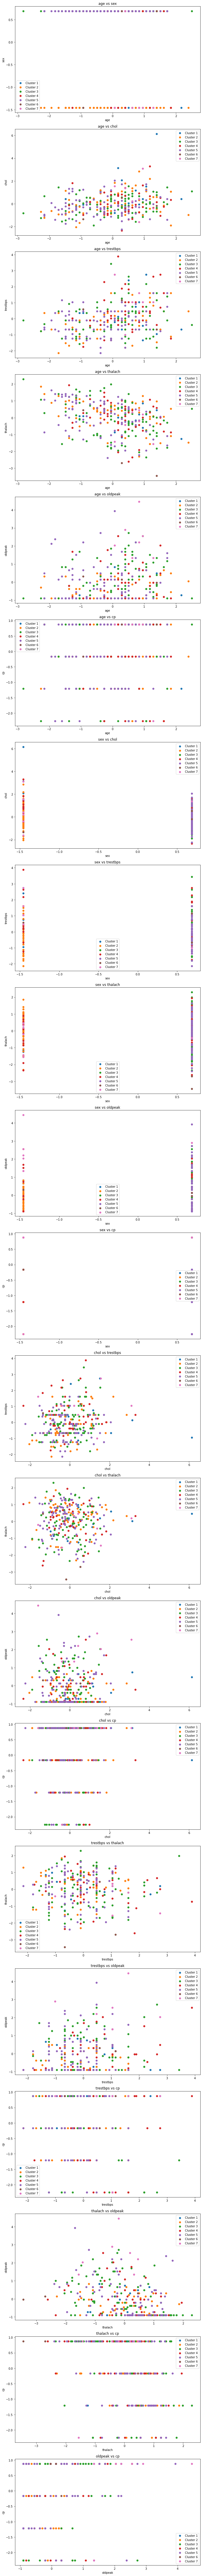

In [24]:
num_clusters = 7
columns = ['age', 'sex', 'chol', 'trestbps', 'thalach', 'oldpeak', 'cp'] 

df_gmm=GMM(df_stand, num_clusters)
plot_clusters(df_gmm, columns, num_clusters)

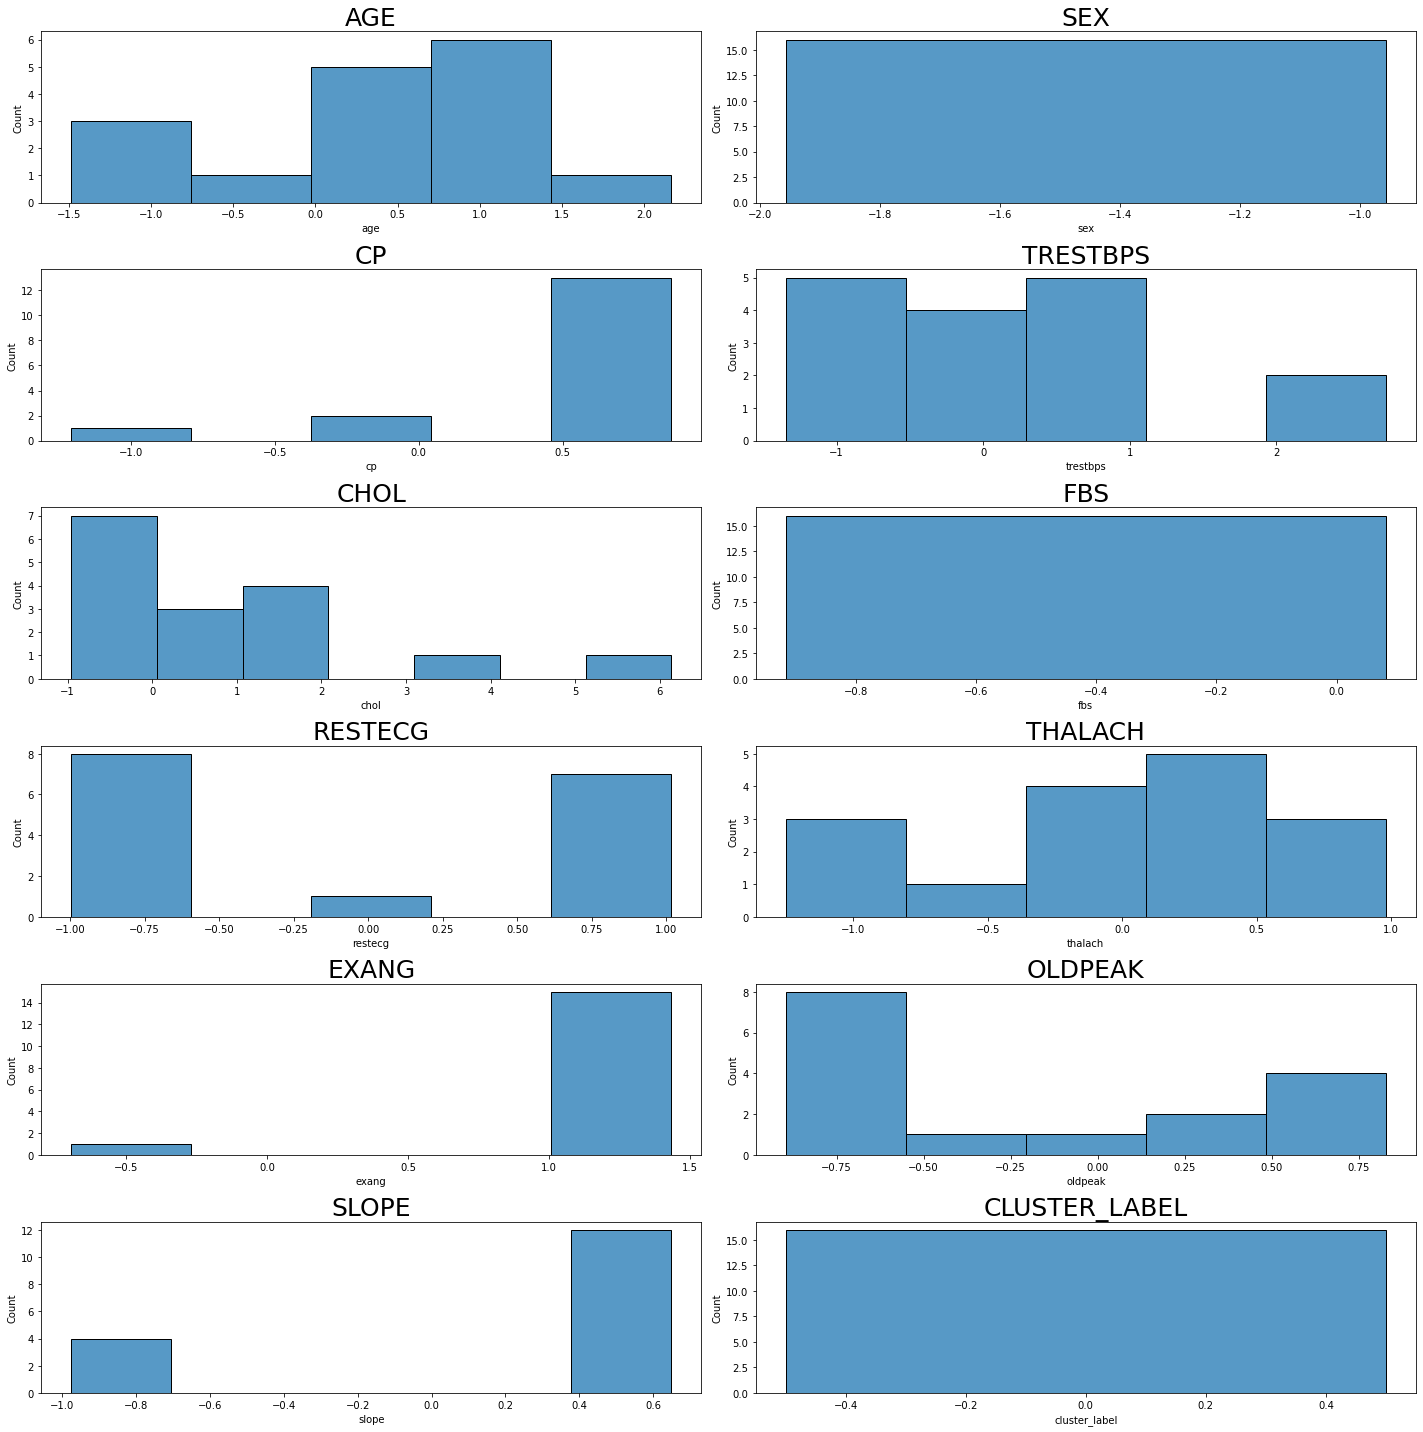

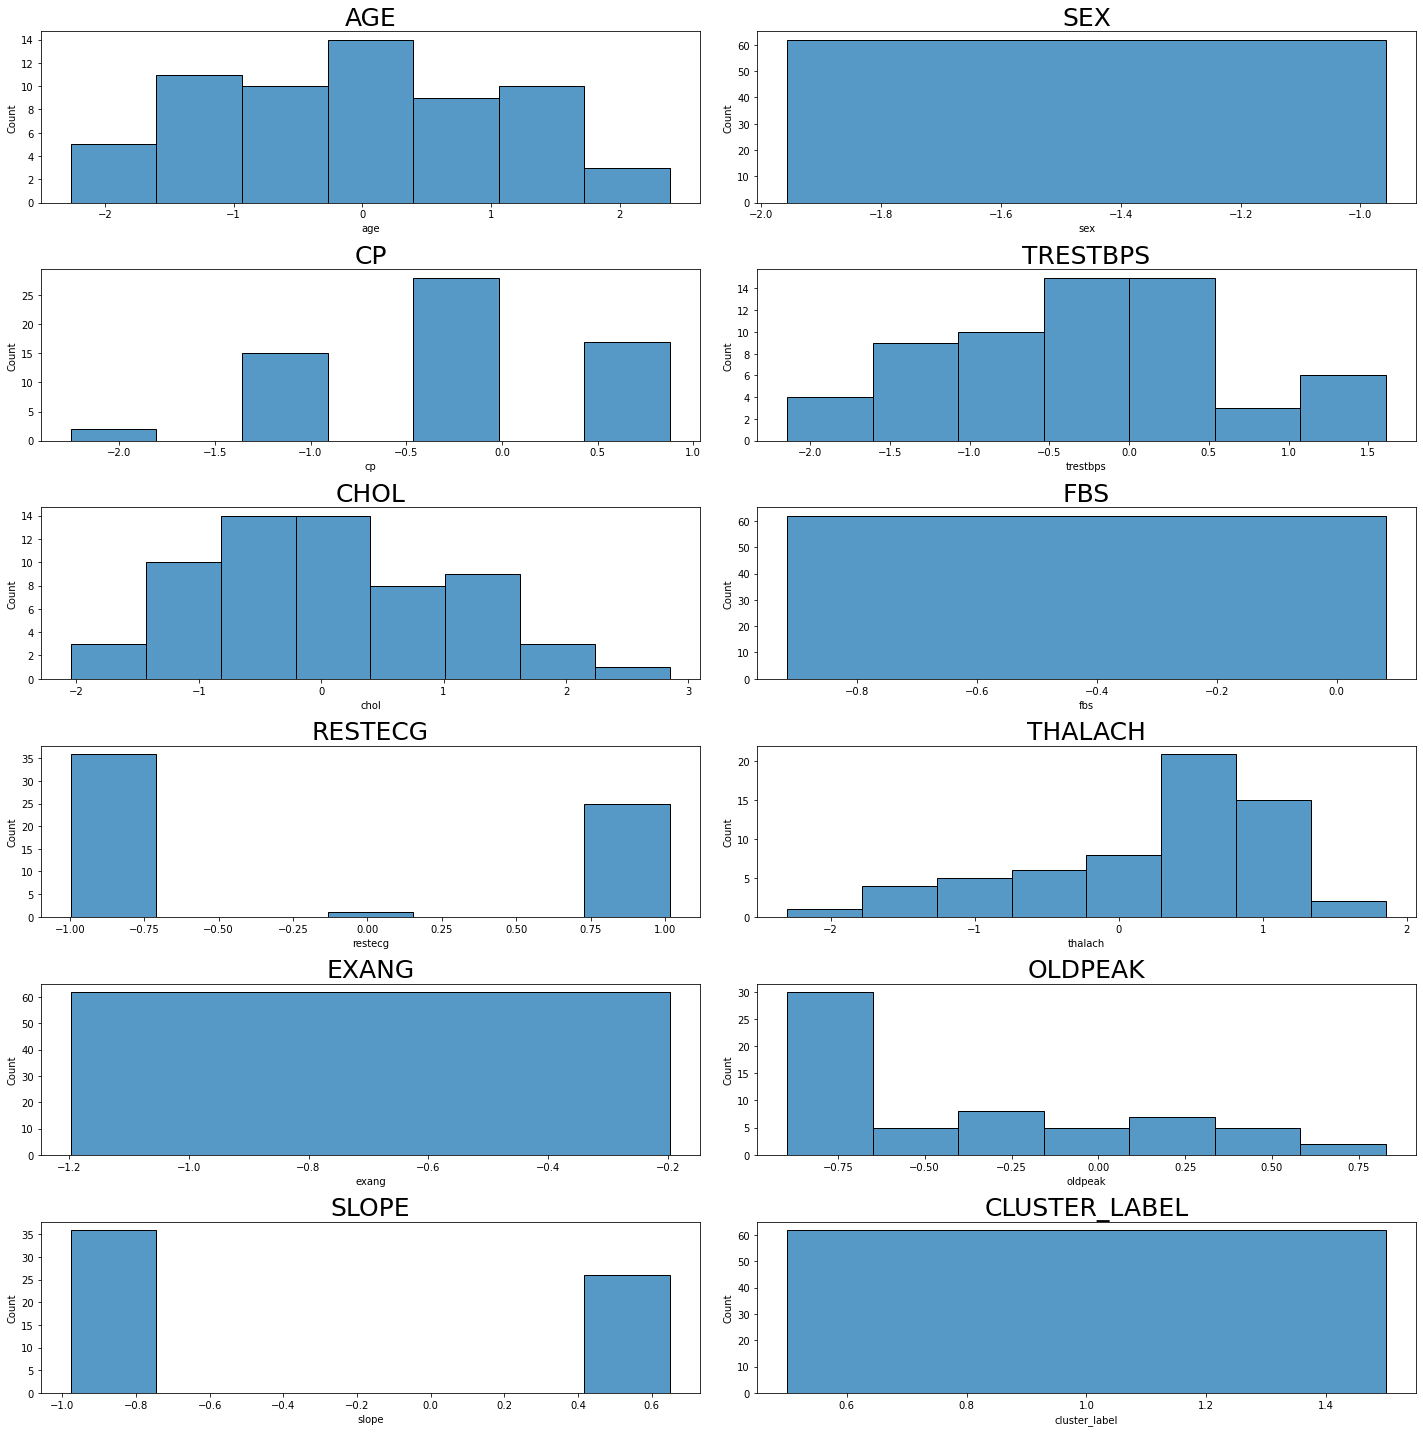

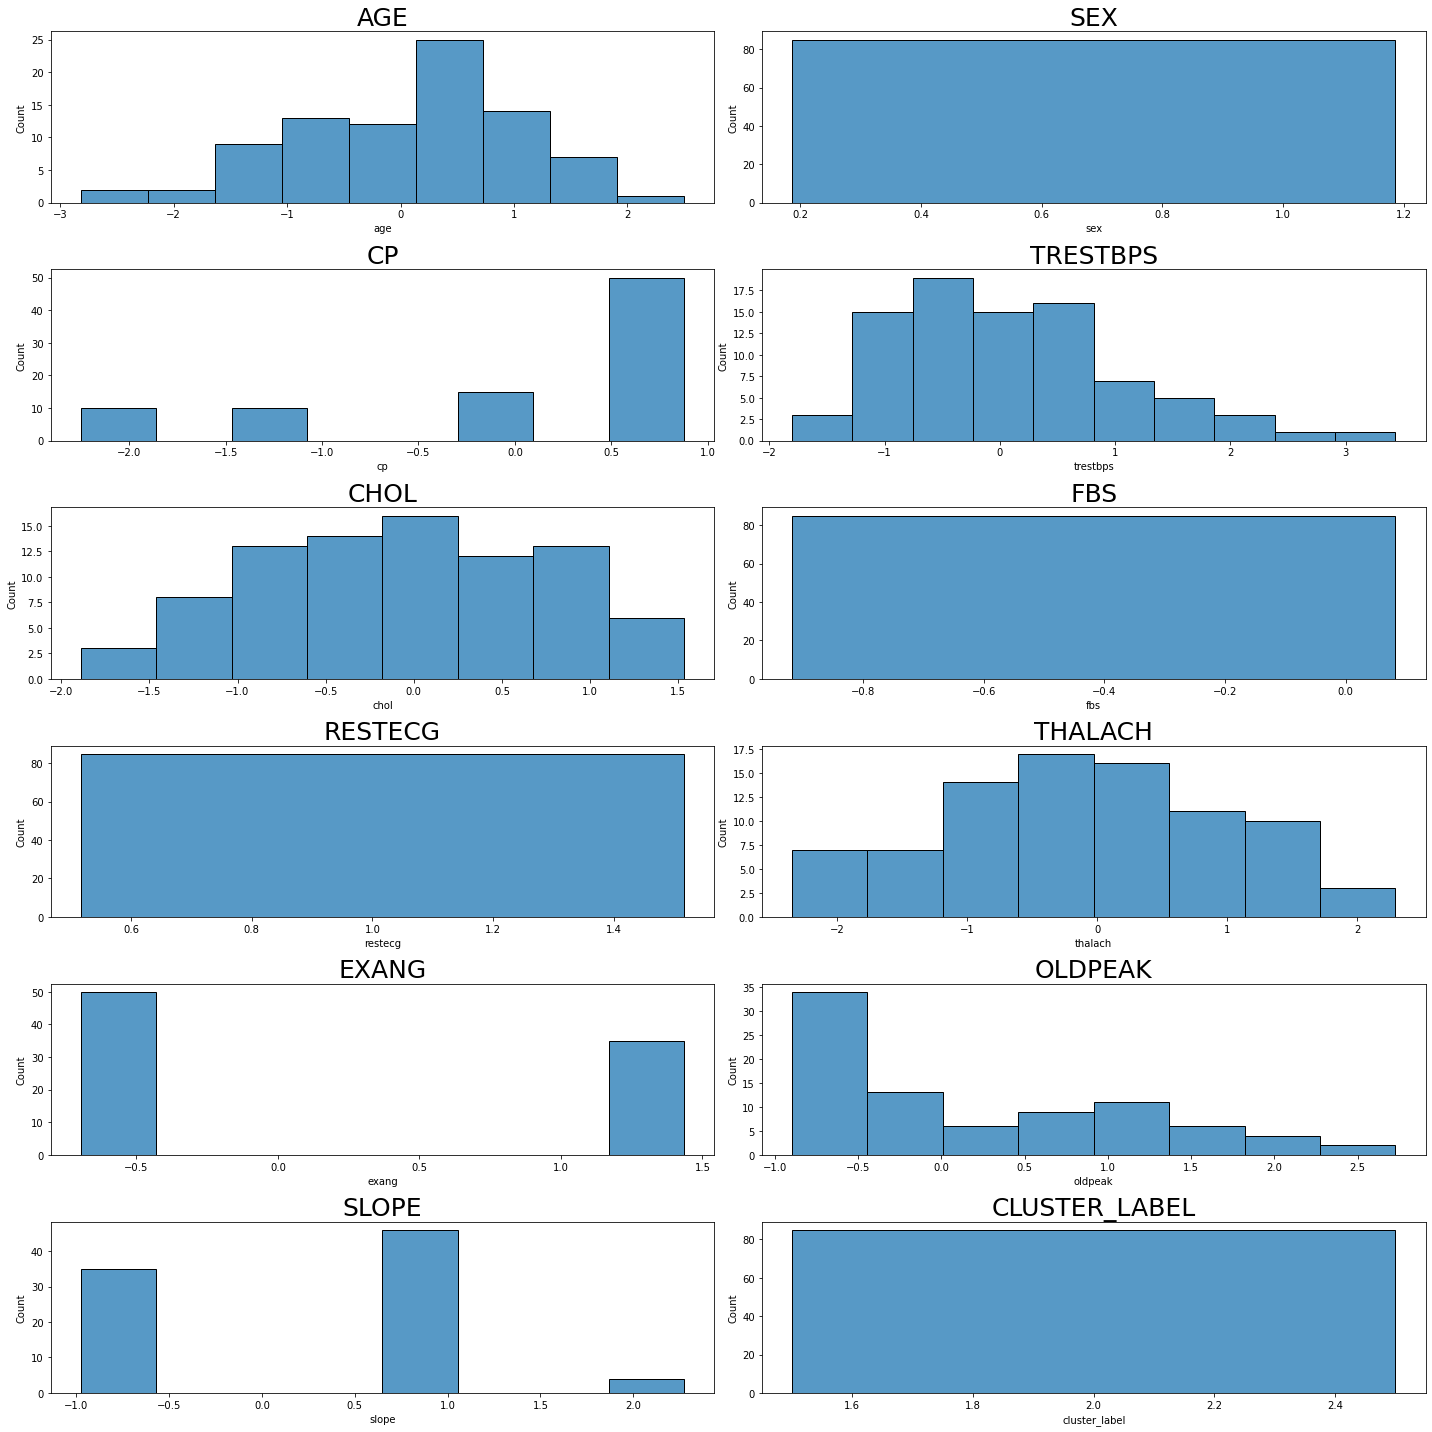

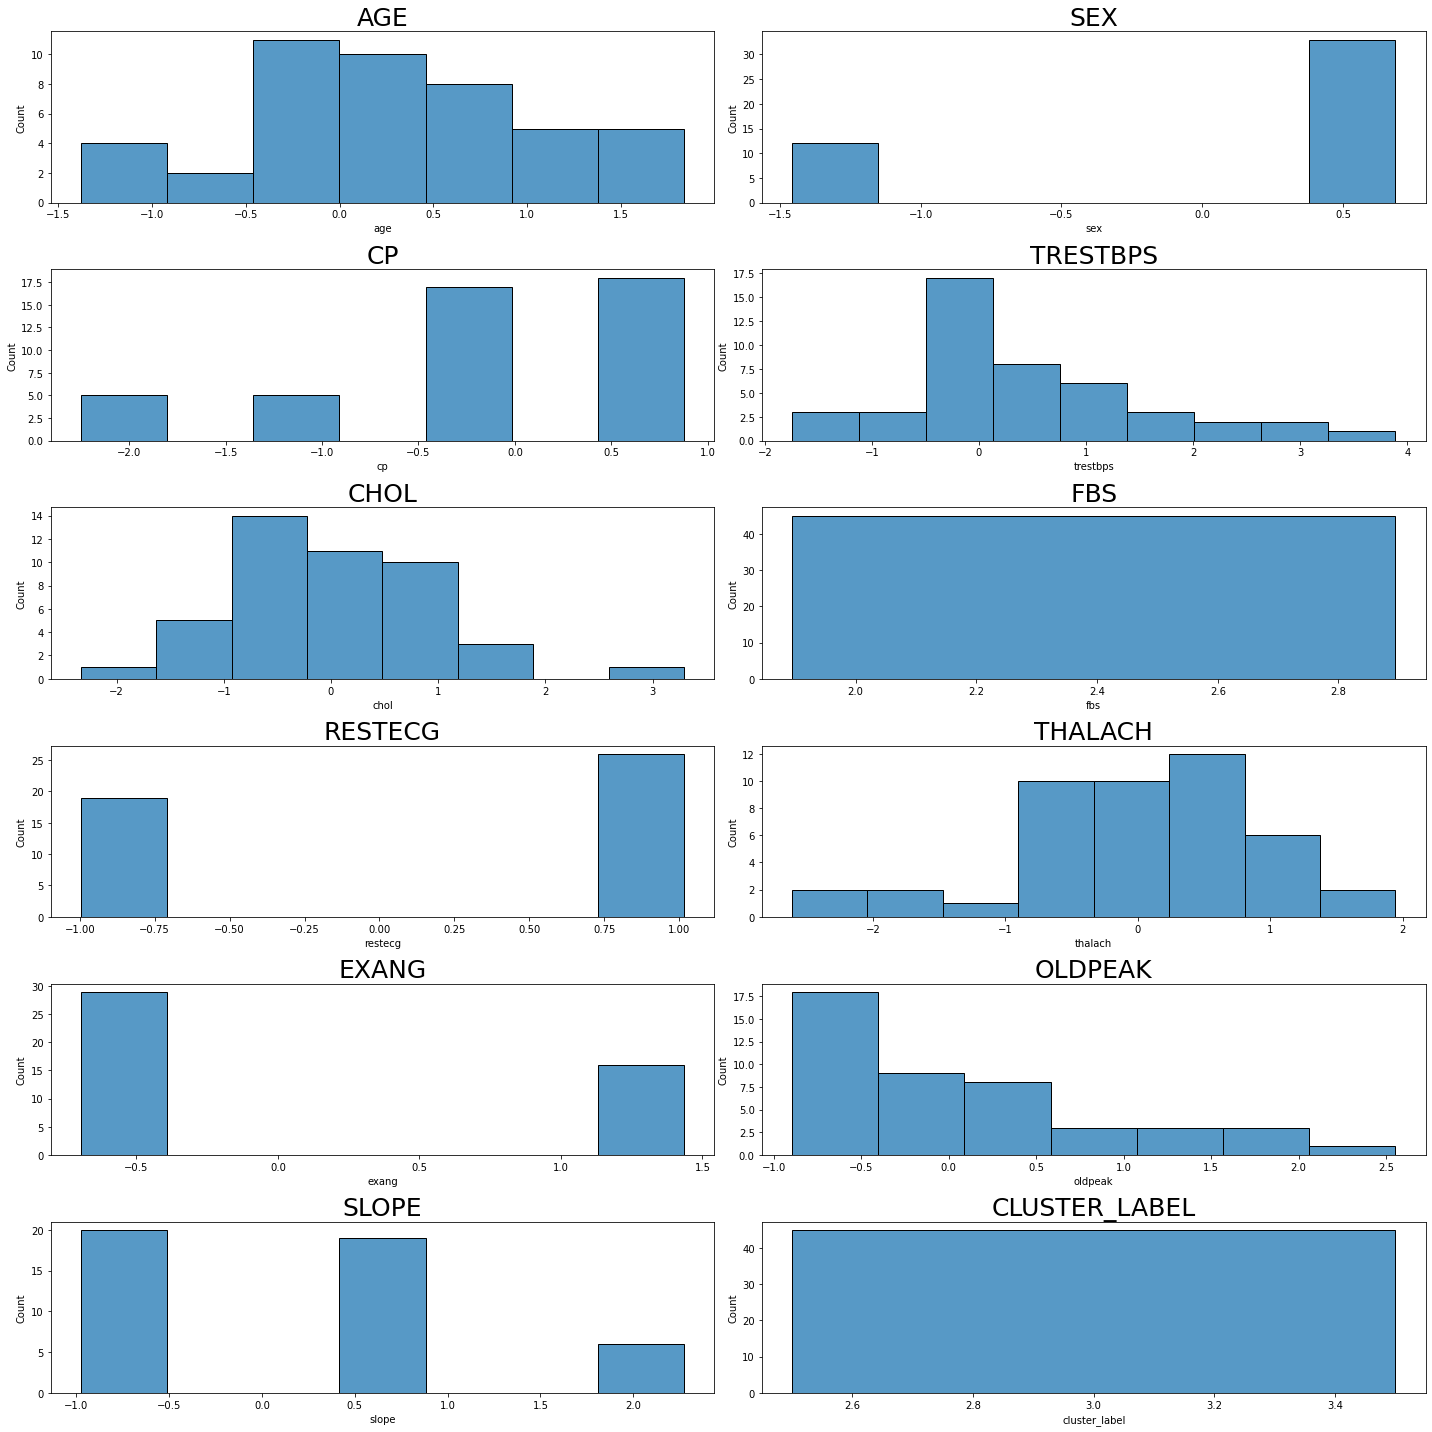

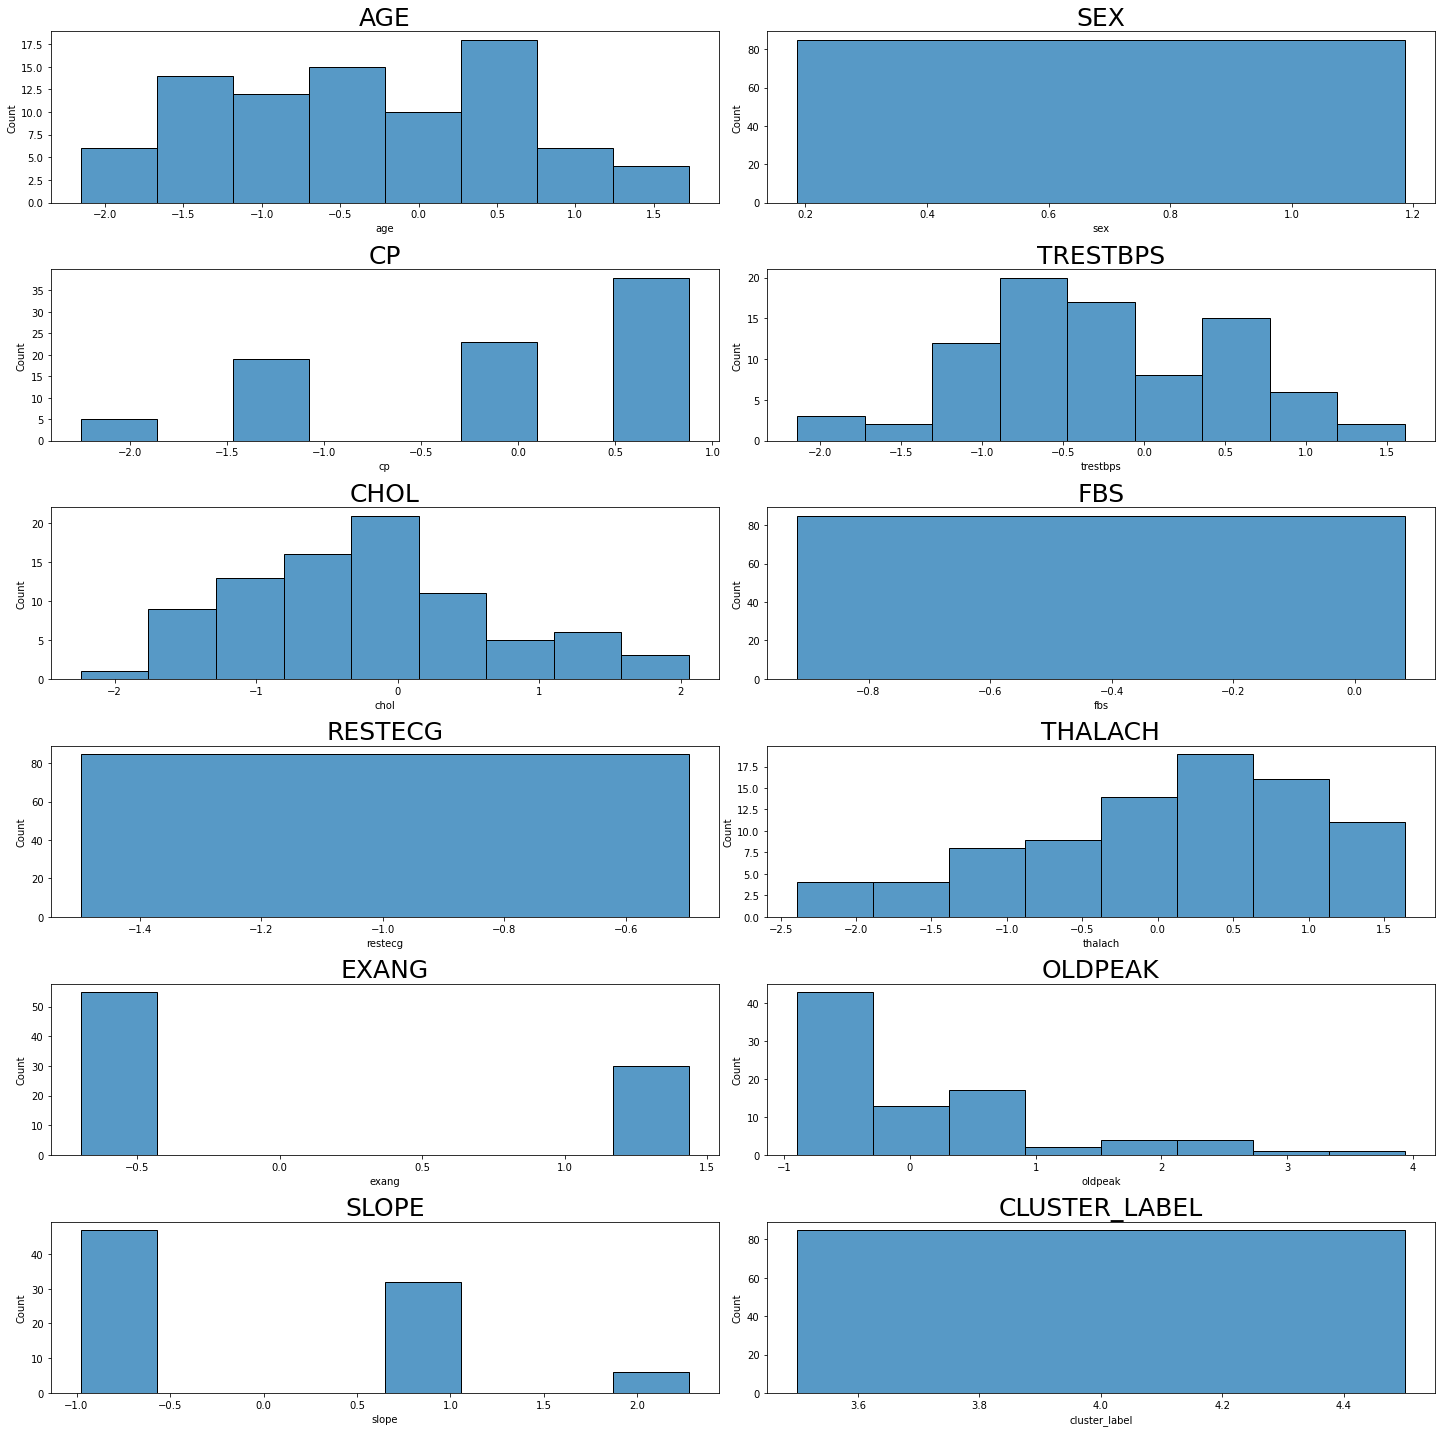

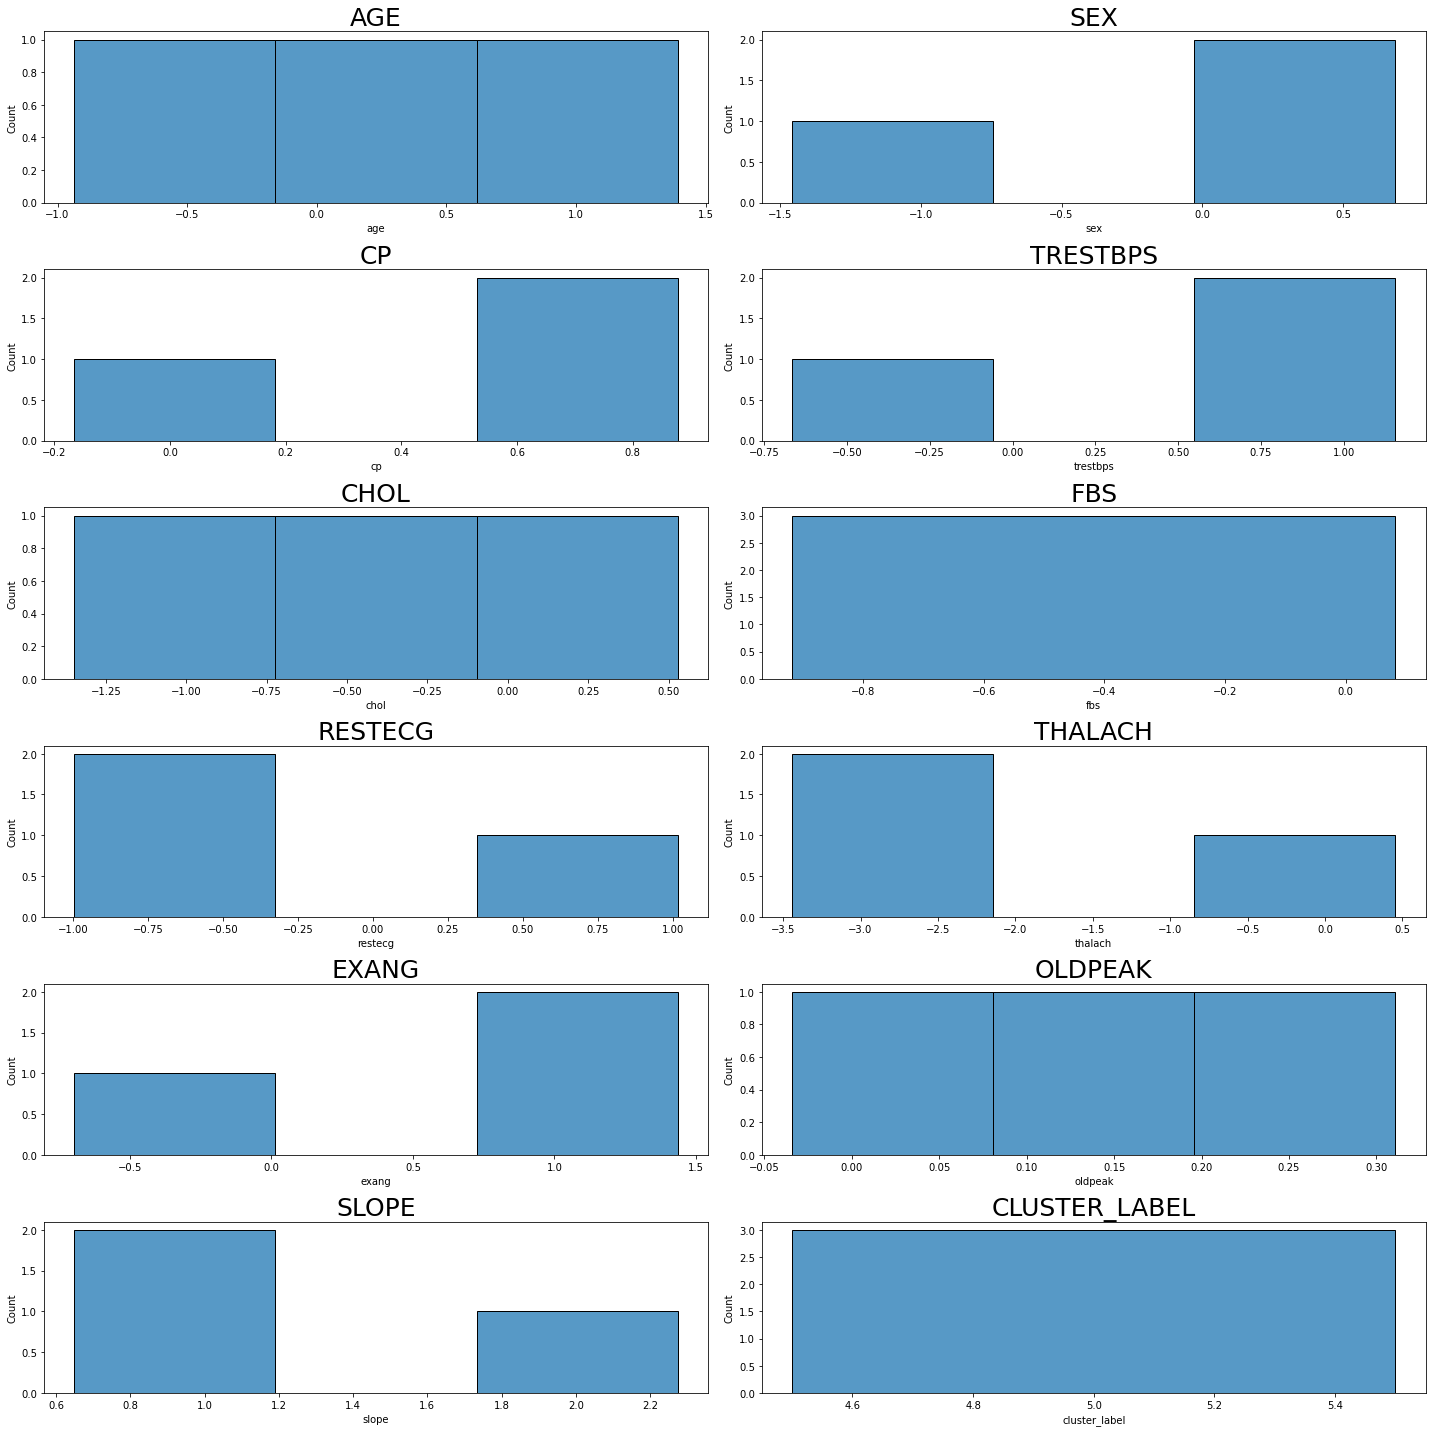

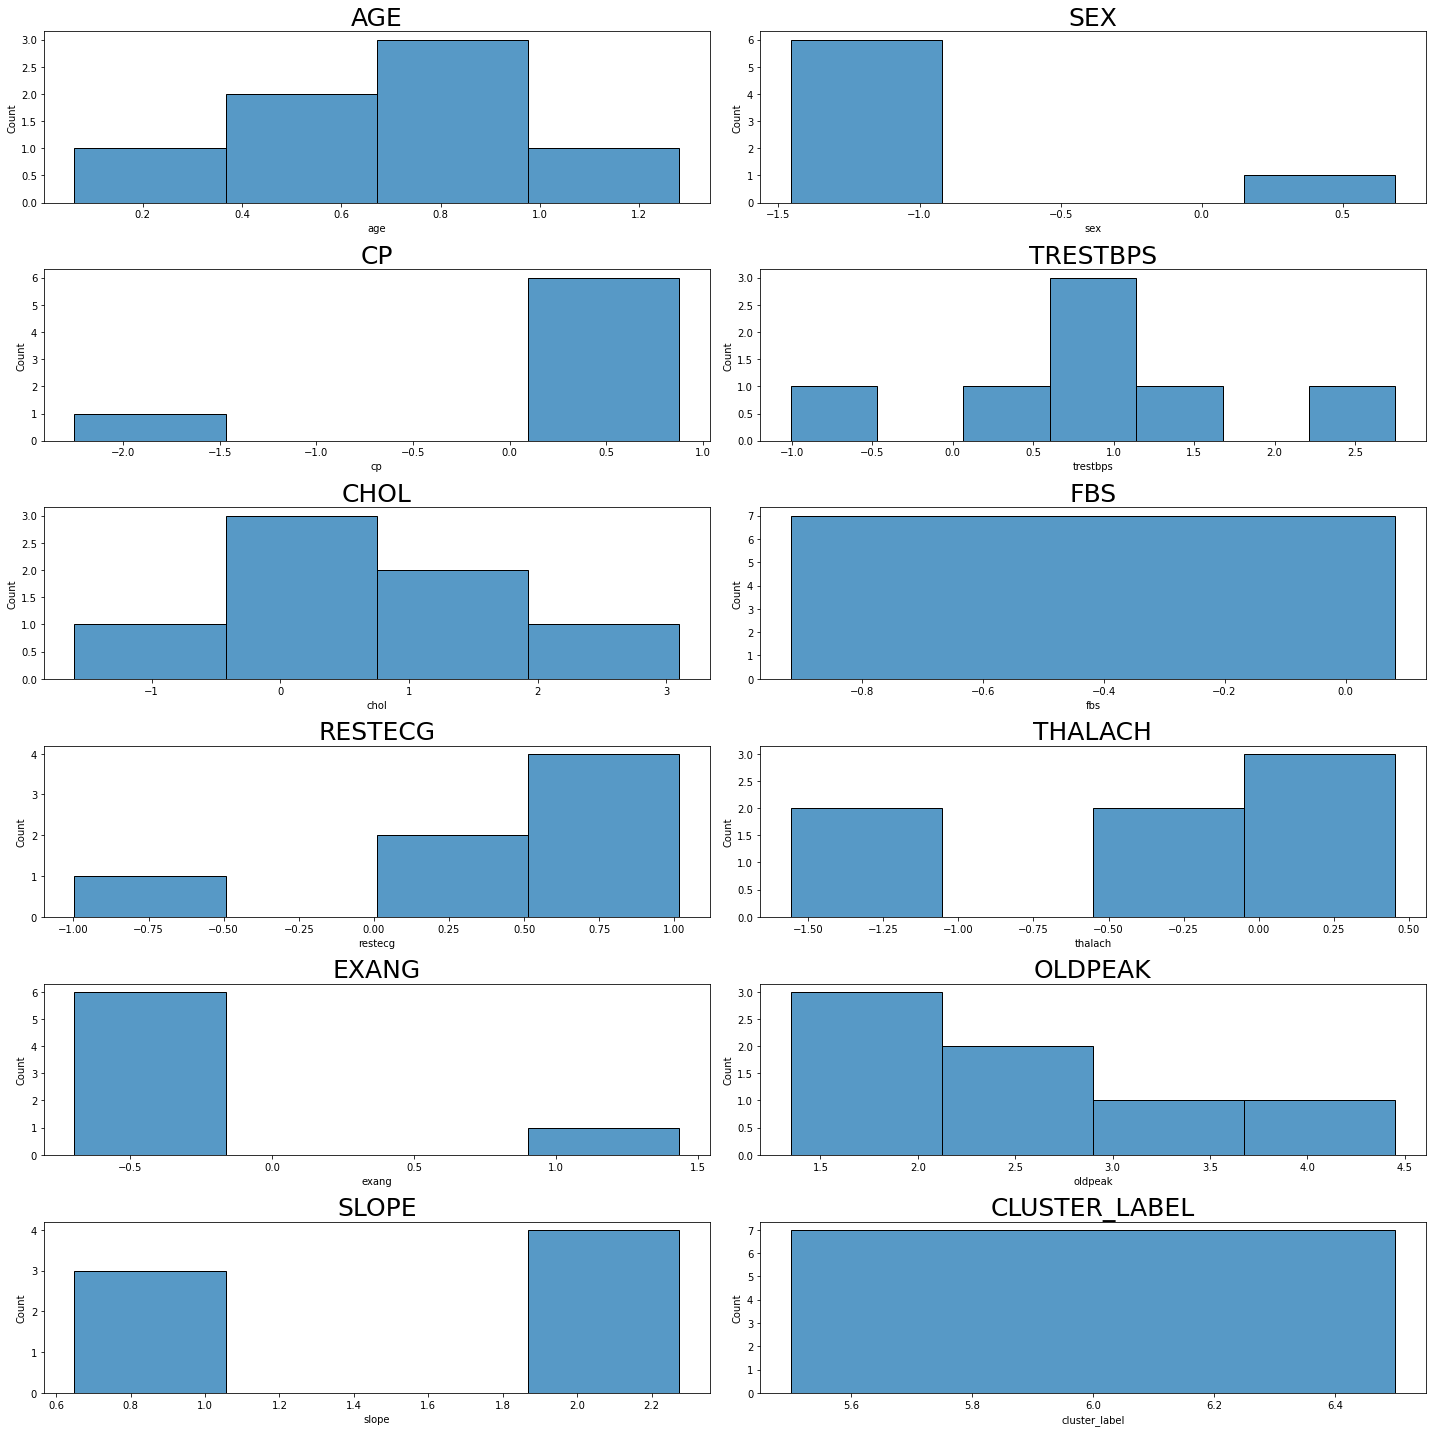

In [104]:
for i in range(num_clusters):
    plotPerColumnDistribution(df_gmm[df_gmm['cluster_label']==i])

## PCA

Let's see if PCA can solve our problems.

Transforming with PCA

PCA for visualisation

In [76]:
num_clusters=7
pca = PCA(n_components=2)


X_pcasc = pca.fit_transform(df_scaled)

PCA with more components for model

In [77]:
pca2 = PCA(n_components=3)
X_pcasc2 = pca2.fit_transform(df_scaled)

In [19]:
print("PCA components values:")
for i in range(pca.n_components_):
    print(f"PCA_ {i+1}: {pca.components_[i]}")
    
explained_variance_ratio = pca.explained_variance_ratio_
print("Percentage:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PCA_ {i+1}: {ratio*100:.2f}%")

PCA components values:
PCA_ 1: [-0.07199588  0.06613013  0.32682036  0.25989052  0.04201183  0.01881575
  0.07781746  0.52568213 -0.13797289  0.65776295  0.14630781  0.24182204]
PCA_ 2: [-0.08742632  0.05571562 -0.4410792  -0.11178207  0.05274112  0.05323337
  0.05737303  0.79331208  0.04829632 -0.37478236 -0.02996723 -0.01621058]
Percentage:
PCA_ 1: 24.48%
PCA_ 2: 19.26%


KMeans and PCA

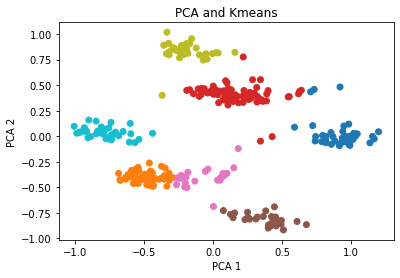

In [20]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X_pcasc)
labels = kmeans.labels_


# Wykres wyników PCA
plt.scatter(X_pcasc[:, 0], X_pcasc[:, 1], c=labels, cmap='tab10')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA and Kmeans")
plt.show()

GMM and PCA

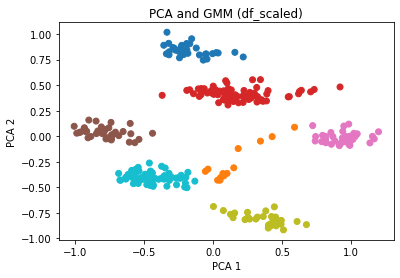

In [21]:
gmm = GaussianMixture(n_components=num_clusters, covariance_type='full', max_iter=100, tol=1e-3, random_state=42)
gmm.fit(X_pcasc)
labels3=gmm.predict(X_pcasc)


plt.scatter(X_pcasc[:, 0], X_pcasc[:, 1], c=labels3, cmap='tab10')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA and GMM (df_scaled)")
plt.show()

Example for standarized df, GMM and PCA

PCA values for standarized df:
OCA 1: [-0.04305477  0.31907457  0.05257062  0.30605262  0.19433365  0.1152484
  0.07453537  0.19053676 -0.44215628  0.37250361  0.44094899  0.42225723]
OCA 2: [-0.17434297  0.35441499 -0.34835334 -0.23780428  0.44597387  0.45237185
  0.25088618  0.30226603  0.16726686 -0.25325441 -0.07450794 -0.10288137]


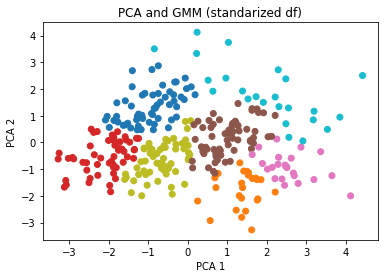

In [22]:
X_pcast = pca.fit_transform(df_stand)

print("PCA values for standarized df:")
for i in range(pca.n_components_):
    print(f"OCA {i+1}: {pca.components_[i]}")
    
gmm = GaussianMixture(n_components=num_clusters, covariance_type='full', max_iter=100, tol=1e-3, random_state=42)
gmm.fit(X_pcast)
labels2=gmm.predict(X_pcast)

plt.scatter(X_pcast[:, 0], X_pcast[:, 1], c=labels2, cmap='tab10')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA and GMM (standarized df)")
plt.show()


Summarizing, it seems that GMM and scaling is the best option, and we have 7 clusters. The main factors seem to be sex, cp, thalach, oldpeak.

Let's visualize it.

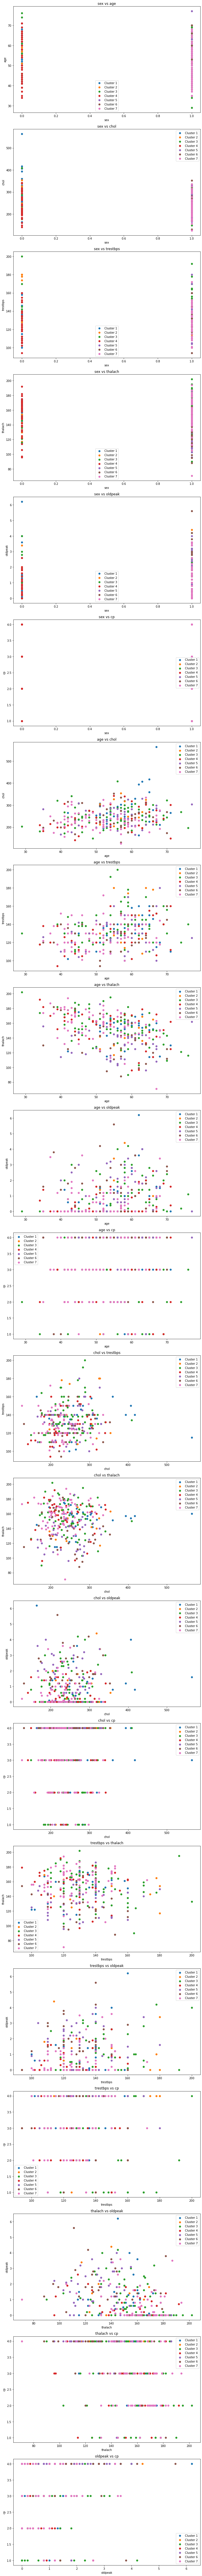

In [24]:
num_clusters=7
pca = PCA(n_components=2)

X_pcasc = pca.fit_transform(df_scaled)

gmm = GaussianMixture(n_components=7, random_state=42)
gmm.fit(X_pcasc)
labels_gmm=gmm.predict(X_pcasc)

#df.drop('cluster_label', axis=1, inplace=True)
df_gmm=df.copy()
df_gmm['cluster_label']=labels_gmm

columns = ['sex', 'age', 'chol', 'trestbps', 'thalach', 'oldpeak', 'cp'] 

plot_clusters(df_gmm, columns, num_clusters)

In [25]:
pd.options.display.max_rows = 4000

We can observe some interesting facts about clustered data frame, but we will check feature importance in next part of report.

In [26]:
df_gmm.groupby("cluster_label").describe().T

cluster_label            0           1           2           3           4  \
id       count   34.000000   13.000000   72.000000   40.000000   42.000000   
         mean   127.411765  195.923077  148.138889  172.675000  130.785714   
         std     80.727419   96.246612   78.095879   86.854251   84.881420   
         min      5.000000    8.000000    1.000000   19.000000    2.000000   
         25%     79.000000  173.000000   85.250000  109.750000   63.750000   
         50%    103.500000  214.000000  141.000000  201.500000  127.500000   
         75%    182.250000  283.000000  203.250000  242.250000  203.500000   
         max    302.000000  298.000000  297.000000  292.000000  294.000000   
age      count   34.000000   13.000000   72.000000   40.000000   42.000000   
         mean    57.500000   58.538462   54.819444   53.550000   56.404762   
         std      7.249869    4.841064    9.614142   10.834300    8.430663   
         min     41.000000   51.000000   29.000000   34.000000   35.000000   
         25%     53.000000   55.000000   46.750000   44.000000   53.000000   
         50%     58.000000   58.000000   56.000000   54.000000   57.500000   
         75%     62.750000   63.000000   61.250000   62.250000   61.000000   
         max     71.000000   66.000000   76.000000   71.000000   77.000000   
sex      count   34.000000   13.000000   72.000000   40.000000   42.000000   
         mean     0.000000    0.153846    0.833333    0.000000    1.000000   
         std      0.000000    0.375534    0.375293    0.000000    0.000000   
         min      0.000000    0.000000    0.000000    0.000000    1.000000   
         25%      0.000000    0.000000    1.000000    0.000000    1.000000   
         50%      0.000000    0.000000    1.000000    0.000000    1.000000   
         75%      0.000000    0.000000    1.000000    0.000000    1.000000   
         max      0.000000    1.000000    1.000000    0.000000    1.000000   
cp       count   34.000000   13.000000   72.000000   40.000000   42.000000   
         mean     3.176471    3.769231    2.888889    2.800000    3.857143   
         std      0.833779    0.832050    1.081933    0.853349    0.521322   
         min      1.000000    1.000000    1.000000    1.000000    1.000000   
         25%      3.000000    4.000000    2.000000    2.000000    4.000000   
         50%      3.000000    4.000000    3.000000    3.000000    4.000000   
         75%      4.000000    4.000000    4.000000    3.000000    4.000000   
         max      4.000000    4.000000    4.000000    4.000000    4.000000   
trestbps count   34.000000   13.000000   72.000000   40.000000   42.000000   
         mean   133.088235  142.384615  136.958333  127.350000  130.690476   
         std     15.766031   26.850011   19.103453   16.335505   17.727597   
         min    100.000000  108.000000  110.000000   94.000000  100.000000   
         25%    128.000000  124.000000  123.500000  118.000000  120.000000   
         50%    135.000000  130.000000  132.000000  128.000000  130.000000   
         75%    140.000000  174.000000  145.000000  138.000000  140.000000   
         max    160.000000  180.000000  200.000000  160.000000  180.000000   
chol     count   34.000000   13.000000   72.000000   40.000000   42.000000   
         mean   283.058824  267.307692  247.472222  239.350000  246.500000   
         std     76.043425   52.670967   44.560126   51.802658   42.985675   
         min    164.000000  197.000000  149.000000  141.000000  166.000000   
         25%    239.000000  228.000000  220.500000  203.250000  208.750000   
         50%    265.000000  249.000000  245.000000  224.500000  252.500000   
         75%    304.500000  318.000000  275.750000  275.500000  280.500000   
         max    564.000000  354.000000  409.000000  342.000000  330.000000   
fbs      count   34.000000   13.000000   72.000000   40.000000   42.000000   
         mean     0.117647    0.076923    0.194444    0.075000    0.190476   
         std      0.32

In [27]:
df_gmm.groupby("cluster_label").median().T

cluster_label,0,1,2,3,4,5,6
id,103.5,214.0,141.00,201.5,127.5,142.50,163.00
age,58.0,58.0,56.00,54.0,57.5,56.00,52.00
sex,0.0,0.0,1.00,0.0,1.0,1.00,1.00
cp,3.0,4.0,3.00,3.0,4.0,4.00,3.00
trestbps,135.0,130.0,132.00,128.0,130.0,130.00,125.00
chol,265.0,249.0,245.00,224.5,252.5,241.00,229.50
fbs,0.0,0.0,0.00,0.0,0.0,0.00,0.00
restecg,2.0,0.0,2.00,0.0,2.0,0.00,0.00
thalach,157.0,142.0,155.50,162.0,132.0,134.50,161.00
exang,0.0,1.0,0.00,0.0,1.0,1.00,0.00


## T-sne

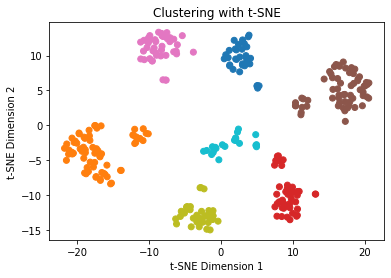

In [28]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_scaled)

# Perform clustering on the t-SNE transformed data
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_tsne)
labels = kmeans.labels_

# Visualize the results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Clustering with t-SNE')
plt.show()


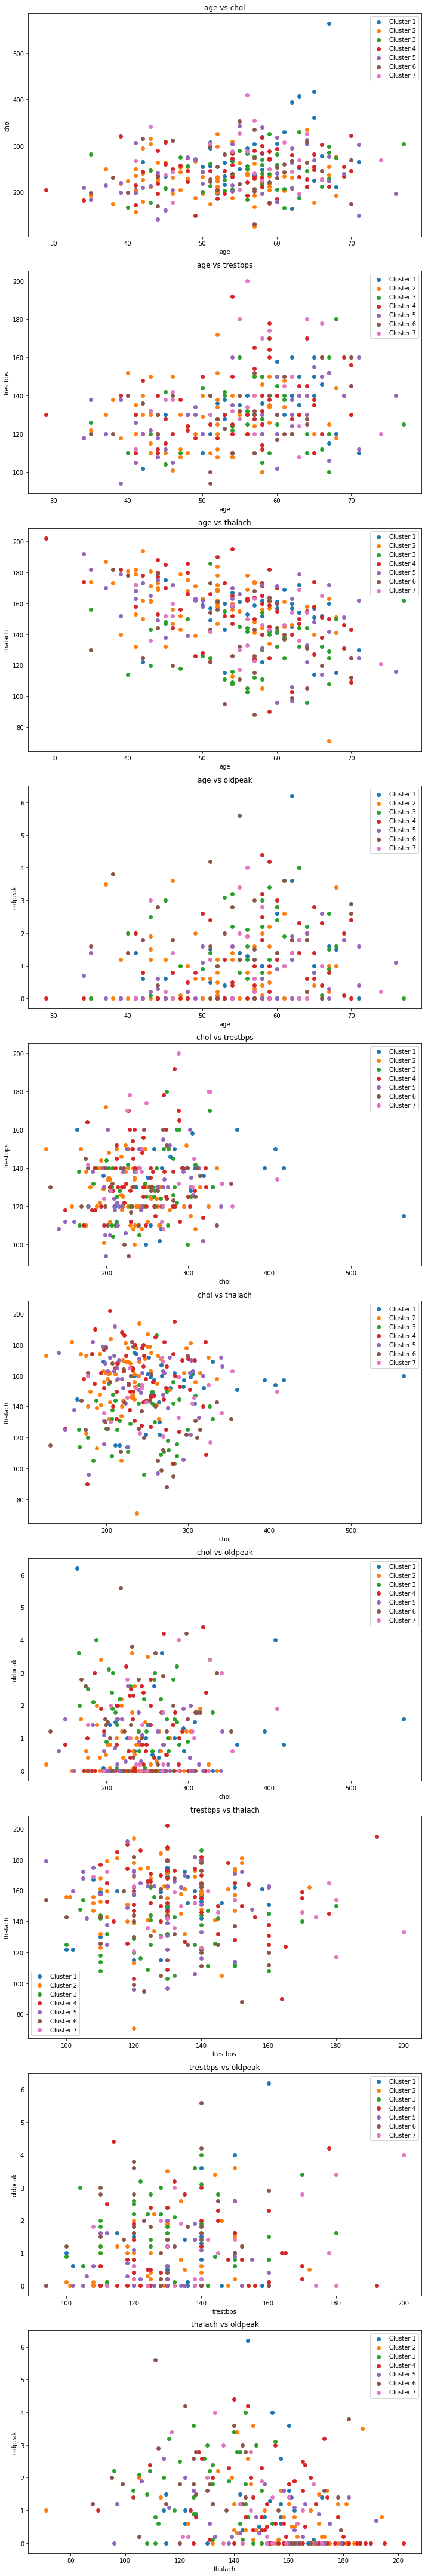

In [29]:
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_tsne)
labels = kmeans.labels_

#df.drop('cluster_label', axis=1, inplace=True)
df_kmTsne=df.copy()
df_kmTsne['cluster_label']=labels


columns = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak'] 

plot_clusters(df_kmTsne, columns, num_clusters)

In [30]:
df_kmTsne.groupby("cluster_label").median().T

cluster_label,0,1,2,3,4,5,6
id,103.5,163.00,121.0,138.0,204.0,142.50,206.0
age,58.0,52.00,57.0,57.0,54.0,56.00,56.5
sex,0.0,1.00,1.0,1.0,0.0,1.00,0.0
cp,3.0,3.00,4.0,3.0,3.0,4.00,4.0
trestbps,135.0,125.00,130.0,130.0,130.0,130.00,138.0
chol,265.0,229.50,249.0,245.0,223.0,241.00,268.5
fbs,0.0,0.00,0.0,0.0,0.0,0.00,0.0
restecg,2.0,0.00,2.0,2.0,0.0,0.00,1.5
thalach,157.0,161.00,132.0,158.0,162.0,134.50,148.0
exang,0.0,0.00,1.0,0.0,0.0,1.00,1.0


To sum up, we decided to use GMM model with PCA, at first sight the most differentiating variables seem to be sex, cp, restecg, thalach and oldpeak.

## Interpretation:

Our clustering labels.

In [85]:
gmm = GaussianMixture(n_components=7, random_state=42)
gmm.fit(X_pcasc2)
labels_gmm=gmm.predict(X_pcasc2)


df_gmm=df.copy()
df_gmm['cluster_label']=labels_gmm
df_gmm.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,cluster_label
0,63,1,1,145,233,1,2,150,0,2.3,3,2
1,67,1,4,160,286,0,2,108,1,1.5,2,4
2,67,1,4,120,229,0,2,129,1,2.6,2,4
3,37,1,3,130,250,0,0,187,0,3.5,3,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0


We check feature importance:

### K best:

In [79]:
k_best = SelectKBest(score_func=chi2, k=5)
X_new = k_best.fit_transform(df, labels_gmm)
imp_features_indices = k_best.get_support(indices=True)
imp_features = df.columns[imp_features_indices]
# print(pd.DataFrame(X_new).head(5))
print(imp_features)

df['cluster_label'] = labels_gmm

print("-------------Mean-------------:")
print((df.groupby('cluster_label')[imp_features]).mean())
print("-------------Median-------------:")
print((df.groupby('cluster_label')[imp_features]).median())
print("-------------Std-------------:")
print((df.groupby('cluster_label')[imp_features]).std())
df.drop('cluster_label', axis=1, inplace=True)

Index(['sex', 'chol', 'restecg', 'thalach', 'exang'], dtype='object')
-------------Mean-------------:
               sex        chol   restecg     thalach     exang
cluster_label                                                 
0              0.0  280.600000  1.971429  150.942857  0.000000
1              1.0  244.470588  0.000000  137.352941  1.000000
2              1.0  242.833333  2.000000  156.966667  0.000000
3              1.0  229.294118  0.000000  157.985294  0.000000
4              1.0  247.363636  1.977273  132.522727  0.977273
5              0.0  272.500000  1.090909  146.500000  1.000000
6              0.0  239.350000  0.000000  154.075000  0.000000
-------------Median-------------:
               sex   chol  restecg  thalach  exang
cluster_label                                     
0              0.0  265.0      2.0    157.0    0.0
1              1.0  241.0      0.0    134.5    1.0
2              1.0  244.5      2.0    158.5    0.0
3              1.0  229.5      0.0    161.

And scores:

In [80]:
scores = k_best.scores_

feature_scores = [(feature, score) for feature, score in zip(df.columns, scores)]

sorted_feature_scores = sorted(feature_scores, key=lambda x: x[1], reverse=True)

print("The most importatnt features:")
for feature, score in sorted_feature_scores:
    print(f"{feature}: {score}")

The most importatnt features:
chol: 319.07808468182657
restecg: 279.9754480519479
exang: 201.00895316804417
thalach: 180.7695868155333
sex: 96.99999999999984
trestbps: 52.0871436317684
oldpeak: 45.18533007263521
age: 27.925414065100405
cp: 15.000359779135463
slope: 6.443681412583823
fbs: 4.301948476360232


### Random forest

In [56]:
df_gmm

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,cluster_label
0,63,1,1,145,233,1,2,150,0,2.3,3,2
1,67,1,4,160,286,0,2,108,1,1.5,2,4
2,67,1,4,120,229,0,2,129,1,2.6,2,4
3,37,1,3,130,250,0,0,187,0,3.5,3,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0
5,56,1,2,120,236,0,0,178,0,0.8,1,3
6,62,0,4,140,268,0,2,160,0,3.6,3,0
7,57,0,4,120,354,0,0,163,1,0.6,1,5
8,63,1,4,130,254,0,2,147,0,1.4,2,2
9,53,1,4,140,203,1,2,155,1,3.1,3,4


In [81]:
rf = RandomForestClassifier()

y=df_gmm['cluster_label']
df_gmm.drop('cluster_label', axis=1, inplace=True)
rf.fit(df_gmm, y)

importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(df_gmm.shape[1]):
    print(f"{f + 1}. Feature '{df_gmm.columns[indices[f]]}' ({importances[indices[f]]})")

Feature ranking:
1. Feature 'restecg' (0.2683186804153942)
2. Feature 'sex' (0.24257926842848473)
3. Feature 'exang' (0.20982152883104238)
4. Feature 'thalach' (0.059815432774358676)
5. Feature 'chol' (0.05068109016255512)
6. Feature 'trestbps' (0.04724551491959479)
7. Feature 'age' (0.04213929714850658)
8. Feature 'oldpeak' (0.03353909881766287)
9. Feature 'cp' (0.030466200333531254)
10. Feature 'slope' (0.01133219208259979)
11. Feature 'fbs' (0.00406169608626964)


From K best and random forest, we can conclude that **restecg, sex, exang, chol, thalach** are the most important features.

# Description of clusters

In [118]:
pd.options.display.max_rows = 4000

In [60]:
df_gmm.groupby('cluster_label').describe().T

cluster_label            0           1           2           3           4  \
age      count   35.000000   34.000000   60.000000   68.000000   44.000000   
         mean    58.028571   54.558824   54.850000   50.970588   56.318182   
         std      7.797004    8.602999    9.307961    8.285882    8.276537   
         min     41.000000   35.000000   29.000000   35.000000   35.000000   
         25%     53.000000   51.000000   48.000000   43.750000   52.500000   
         50%     58.000000   56.000000   57.000000   52.000000   57.500000   
         75%     63.000000   60.000000   62.000000   57.000000   61.000000   
         max     76.000000   70.000000   70.000000   68.000000   77.000000   
sex      count   35.000000   34.000000   60.000000   68.000000   44.000000   
         mean     0.000000    1.000000    1.000000    1.000000    1.000000   
         std      0.000000    0.000000    0.000000    0.000000    0.000000   
         min      0.000000    1.000000    1.000000    1.000000    1.000000   
         25%      0.000000    1.000000    1.000000    1.000000    1.000000   
         50%      0.000000    1.000000    1.000000    1.000000    1.000000   
         75%      0.000000    1.000000    1.000000    1.000000    1.000000   
         max      0.000000    1.000000    1.000000    1.000000    1.000000   
cp       count   35.000000   34.000000   60.000000   68.000000   44.000000   
         mean     3.171429    3.529412    2.783333    2.911765    3.795455   
         std      0.821967    0.861123    1.106095    0.909901    0.667503   
         min      1.000000    1.000000    1.000000    1.000000    1.000000   
         25%      3.000000    3.000000    2.000000    2.000000    4.000000   
         50%      3.000000    4.000000    3.000000    3.000000    4.000000   
         75%      4.000000    4.000000    4.000000    4.000000    4.000000   
         max      4.000000    4.000000    4.000000    4.000000    4.000000   
trestbps count   35.000000   34.000000   60.000000   68.000000   44.000000   
         mean   133.285714  129.705882  135.966667  127.529412  130.181818   
         std     15.576323   15.375166   18.280272   14.470217   17.510492   
         min    100.000000   94.000000  110.000000  100.000000  100.000000   
         25%    128.000000  120.000000  121.500000  120.000000  120.000000   
         50%    135.000000  130.000000  130.000000  125.000000  129.000000   
         75%    140.000000  140.000000  145.750000  138.000000  140.000000   
         max    160.000000  160.000000  192.000000  172.000000  180.000000   
chol     count   35.000000   34.000000   60.000000   68.000000   44.000000   
         mean   280.600000  244.470588  242.833333  229.294118  247.363636   
         std     76.315984   50.289004   38.831303   40.001141   43.658341   
         min    164.000000  131.000000  149.000000  126.000000  166.000000   
         25%    235.000000  209.500000  217.750000  203.000000  210.250000   
         50%    265.000000  241.000000  244.500000  229.500000  252.500000   
         75%    304.000000  272.750000  273.000000  250.000000  282.000000   
         max    564.000000  353.000000  322.000000  335.000000  330.000000   
fbs      count   35.000000   34.000000   60.000000   68.000000   44.000000   
         mean     0.114286    0.088235    0.166667    0.176471    0.181818   
         std      0.322803    0.287902    0.375823    0.384054    0.390154   
         min      0.000000    0.000000    0.000000    0.000000    0.000000   
         25%      0.000000    0.000000    0.000000    0.000000    0.000000   
         50%      0.000000    0.000000    0.000000    0.000000    0.000000   
         75%      0.000000    0.000000    0.000000    0.000000    0.000000   
         max      1.000000    1.000000    1.000000    1.000000    1.000000   
restecg  count   35.000000   34.000000   60.000000   68.000000   44.000000   
         mean     1.971429    0.000000    2.000000    0.000000    1.977273   
         std      0.16

In [88]:
df_gmm.groupby("cluster_label").mean().T

cluster_label,0,1,2,3,4,5,6
age,58.028571,54.558824,54.850000,50.970588,56.318182,56.000000,53.550
sex,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000
cp,3.171429,3.529412,2.783333,2.911765,3.795455,3.727273,2.800
trestbps,133.285714,129.705882,135.966667,127.529412,130.181818,144.318182,127.350
chol,280.600000,244.470588,242.833333,229.294118,247.363636,272.500000,239.350
fbs,0.114286,0.088235,0.166667,0.176471,0.181818,0.227273,0.075
restecg,1.971429,0.000000,2.000000,0.000000,1.977273,1.090909,0.000
thalach,150.942857,137.352941,156.966667,157.985294,132.522727,146.500000,154.075
exang,0.000000,1.000000,0.000000,0.000000,0.977273,1.000000,0.000
oldpeak,0.994286,1.670588,0.911667,0.698529,1.634091,1.186364,0.580


In [89]:
df_gmm.groupby("cluster_label").median().T

cluster_label,0,1,2,3,4,5,6
age,58.0,56.00,57.0,52.00,57.5,56.5,54.0
sex,0.0,1.00,1.0,1.00,1.0,0.0,0.0
cp,3.0,4.00,3.0,3.00,4.0,4.0,3.0
trestbps,135.0,130.00,130.0,125.00,129.0,138.0,128.0
chol,265.0,241.00,244.5,229.50,252.5,268.5,224.5
fbs,0.0,0.00,0.0,0.00,0.0,0.0,0.0
restecg,2.0,0.00,2.0,0.00,2.0,1.5,0.0
thalach,157.0,134.50,158.5,161.00,132.0,148.0,162.0
exang,0.0,1.00,0.0,0.00,1.0,1.0,0.0
oldpeak,0.6,1.45,0.5,0.35,1.6,1.0,0.2


Feature importance for one cluster

In [83]:
def feature_importance_num_cluster(num):
    cluster_data = df_gmm[df_gmm['cluster_label'] == num]
    other_clusters_data = df_gmm[df_gmm['cluster_label'] != num]

    sampled_other_clusters_data = other_clusters_data#.sample(n=len(cluster_3_data), random_state=42)
    combined_data = pd.concat([cluster_data, sampled_other_clusters_data])

    X_features = combined_data.drop('cluster_label', axis=1)
    y_labels = np.where(combined_data['cluster_label'] == num, 1, 0)

    rf_model = RandomForestClassifier()
    rf_model.fit(X_features, y_labels)

    feature_importances = rf_model.feature_importances_

    for feature, importance in enumerate(feature_importances):
        feature_name = X_features.columns[feature]
        print(f"Feature {feature_name}: {importance}")

### Cluster 0: older women with high cholesterol and bad resting eletrocardiographic results

In [86]:
feature_importance_num_cluster(0)

Feature age: 0.05806441925870633
Feature sex: 0.33388573359067325
Feature cp: 0.015236457414613632
Feature trestbps: 0.04276076171917837
Feature chol: 0.08199183760866792
Feature fbs: 0.003140672201410537
Feature restecg: 0.2645211606378315
Feature thalach: 0.047282037354681276
Feature exang: 0.10222675298589579
Feature oldpeak: 0.038658772442489005
Feature slope: 0.012231394785852431


We took advantage of https://archive.ics.uci.edu/dataset/45/heart+disease to better analyse data.

In this group we can observe that age is higher than average age. Sex equal to 0 means that we have only women in this cluster. They have the highest cholesterol and very bad resting eletrocardiographic results (all patietnts in this group have restecg=2, it is connected with left ventricular hypertrophy), it can result in heart attack in the future. Exang equal to 0 for all members of this cluster is positive sign. They have not induced angina (dangerous chest pain) while exercising. 

Similar analysis were also carried out and thanks to them we could name clusters:

### Cluster 1: men with normal resting eletrocardiographic results without exercise induced angina

In [87]:
feature_importance_num_cluster(1)

Feature age: 0.045493741629382384
Feature sex: 0.08523883471215019
Feature cp: 0.02152988328116204
Feature trestbps: 0.05010099200531076
Feature chol: 0.05868060393828779
Feature fbs: 0.004670963294106672
Feature restecg: 0.30421732888506464
Feature thalach: 0.09275230693326801
Feature exang: 0.2632549053439907
Feature oldpeak: 0.05949398337969598
Feature slope: 0.014566456597580742


### Cluster 2: men with very bad resting eletrocardiographic results

In [90]:
feature_importance_num_cluster(2)

Feature age: 0.03980220286677101
Feature sex: 0.19789822237114385
Feature cp: 0.04641179242110963
Feature trestbps: 0.048268692568961755
Feature chol: 0.04331141686755421
Feature fbs: 0.005426190702912661
Feature restecg: 0.32637449689218345
Feature thalach: 0.07510368178910862
Feature exang: 0.17217525232463576
Feature oldpeak: 0.03403066953763181
Feature slope: 0.011197381657987338


### Cluster 3: younger men with lower resting blood pressure and low cholesterol

In [91]:
feature_importance_num_cluster(3)

Feature age: 0.060248247069185
Feature sex: 0.20315482062005202
Feature cp: 0.02531347531951058
Feature trestbps: 0.03968943716271558
Feature chol: 0.06281397634696936
Feature fbs: 0.00501558248440249
Feature restecg: 0.32448964023174365
Feature thalach: 0.05977237733569139
Feature exang: 0.16591958204237361
Feature oldpeak: 0.035473583382527596
Feature slope: 0.01810927800482885


### Cluster 4: men with lower maximum heart rate and exercise induced angina

In [92]:
feature_importance_num_cluster(4)

Feature age: 0.047866937121602456
Feature sex: 0.11219481536475619
Feature cp: 0.045377770492268876
Feature trestbps: 0.04147816718692674
Feature chol: 0.050556195459017114
Feature fbs: 0.008166635897228963
Feature restecg: 0.2354603153093037
Feature thalach: 0.11023898188322874
Feature exang: 0.28240152230996246
Feature oldpeak: 0.05134344058682724
Feature slope: 0.014915218388877586


### Cluster 5: women with very high resting blood pressure and exercise induced angina

In [93]:
feature_importance_num_cluster(5)

Feature age: 0.03945121617567924
Feature sex: 0.30875848403517203
Feature cp: 0.033976553508734
Feature trestbps: 0.11226415992780227
Feature chol: 0.07153646221923846
Feature fbs: 0.010792013462652463
Feature restecg: 0.014606405062851316
Feature thalach: 0.06295112937646756
Feature exang: 0.29365465076485187
Feature oldpeak: 0.036025690074667945
Feature slope: 0.015983235391882858


### Cluster 6: women with lowest oldpeak, slope and normal resting electrocardiographical results

In [94]:
feature_importance_num_cluster(6)

Feature age: 0.056958038338220655
Feature sex: 0.3791992753827863
Feature cp: 0.033526166817384455
Feature trestbps: 0.04600145526673582
Feature chol: 0.06680236635717533
Feature fbs: 0.003753252961336659
Feature restecg: 0.24998926513775188
Feature thalach: 0.04701338224816981
Feature exang: 0.07290805237793302
Feature oldpeak: 0.02757127787293467
Feature slope: 0.01627746723957142
